# Proyecto 1: Etapa I
Andrés Neira - 202123126

Esteban Castelblanco - 202214942 

Daniel Stiven Roa Uribe - 202215803

## 1. Carga de datos

In [1]:
# Importación de librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

En este primer bloque se realizará la carga de los datos de entrenamiento y de prueba a partir de archivos Excel. Para garantizar que el proceso sea seguro, se utilizará un bloque try-except que permitirá capturar cualquier error en caso de que los archivos no estén disponibles o tengan algún problema de lectura. Una vez cargados, se mostrará información básica de cada dataset: su forma (número de filas y columnas), los nombres de las columnas y una muestra de las primeras cinco filas. Con esto se podrá verificar que los datos fueron cargados correctamente, comprender la estructura general de la información y asegurarse de que tanto los textos como las etiquetas estén presentes antes de continuar con el análisis más detallado.

In [2]:
# Carga de datos
from IPython.display import display
try:
    datos_entrenamiento = pd.read_excel('Datos_proyecto.xlsx')
    datos_prueba = pd.read_excel('Datos de prueba_proyecto.xlsx')
    print("Datos cargados exitosamente\n")
except Exception as e:
    print(f"Error al cargar datos: {e}")

# Información básica de los datasets
print("=== INFORMACIÓN DATASET ENTRENAMIENTO ===\n")
print(f"Forma del dataset: {datos_entrenamiento.shape}")
print(f"Columnas: {list(datos_entrenamiento.columns)}")
print("\nPrimeras 5 filas:")
display(datos_entrenamiento.head())

print("\n=== INFORMACIÓN DATASET PRUEBA ===\n")
print(f"Forma del dataset: {datos_prueba.shape}")
print(f"Columnas: {list(datos_prueba.columns)}")
print("\nPrimeras 5 filas:")
display(datos_prueba.head())

Datos cargados exitosamente

=== INFORMACIÓN DATASET ENTRENAMIENTO ===

Forma del dataset: (2424, 2)
Columnas: ['textos', 'labels']

Primeras 5 filas:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3



=== INFORMACIÓN DATASET PRUEBA ===

Forma del dataset: (152, 1)
Columnas: ['Textos_espanol']

Primeras 5 filas:


,Textos_espanol
0,"El rector, que es el representante local del M..."
1,Tenga en cuenta que todos los programas antipo...
2,"Debido a que son en gran medida invisibles, es..."
3,Los recursos aún son limitados en este sector....
4,"Durante el período 1985-2008, la educación pri..."


## 2. Analísis y corrección de datos

En el siguiente bloque se mostrará información detallada del dataset de entrenamiento, con el fin de conocer mejor la estructura y características de los datos. Primero, se desplegará la función info() para revisar el número de registros, los tipos de datos de cada columna y la presencia de posibles valores nulos. Luego, se presentarán los tipos de datos de manera explícita y se calcularán las estadísticas descriptivas de las variables, lo cual permitirá obtener una visión general sobre la distribución de los valores. Finalmente, se revisará cuántos valores únicos existen en cada columna, lo que ayudará a confirmar que las etiquetas y textos están correctamente definidos y a detectar posibles inconsistencias antes de avanzar con el preprocesamiento.

In [3]:
# Información detallada del dataset de entrenamiento
print("=== INFORMACIÓN DETALLADA ENTRENAMIENTO ===\n")
print(datos_entrenamiento.info())
print("\nTipos de datos:")
print(datos_entrenamiento.dtypes)

print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
display(datos_entrenamiento.describe(include='all'))

# Verificar valores únicos en columnas categóricas
print("\n=== VALORES ÚNICOS POR COLUMNA ===\n")
for columna in datos_entrenamiento.columns:
    valores_unicos = datos_entrenamiento[columna].nunique()
    print(f"{columna}: {valores_unicos} valores únicos")

=== INFORMACIÓN DETALLADA ENTRENAMIENTO ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB
None

Tipos de datos:
textos    object
labels     int64
dtype: object

=== ESTADÍSTICAS DESCRIPTIVAS ===


,textos,labels
count,2424,2424.000000
unique,2424,NaN
top,"""Aprendizaje"" y ""educación"" se consideran sinó...",NaN
freq,1,NaN
mean,NaN,3.006188
std,NaN,1.121012
min,NaN,1.000000
25%,NaN,3.000000
50%,NaN,3.000000
75%,NaN,4.000000



=== VALORES ÚNICOS POR COLUMNA ===

textos: 2424 valores únicos
labels: 3 valores únicos


En el siguiente bloque se realizará el análisis de valores nulos del dataset de entrenamiento, con el fin de identificar posibles problemas de calidad en los datos antes de proceder con el preprocesamiento. Primero, se calculará cuántos valores faltantes existen en cada columna y qué porcentaje representan respecto al total de registros. Estos resultados se organizarán en un resumen tabular, mostrando únicamente aquellas columnas que presenten nulos. Posteriormente, si se detectan valores faltantes, se generará una visualización en forma de gráfico de barras para representar el porcentaje de nulos por columna y facilitar su interpretación. En caso contrario, se confirmará que no existen valores faltantes en el dataset, lo que permitirá continuar el análisis con la seguridad de que la información está completa.

In [4]:
# Análisis de valores nulos
print("=== ANÁLISIS DE VALORES FALTANTES ===")
valores_nulos = datos_entrenamiento.isnull().sum()
porcentaje_nulos = (valores_nulos / len(datos_entrenamiento)) * 100

resumen_nulos = pd.DataFrame({
    'columna': valores_nulos.index,
    'valores_nulos': valores_nulos.values,
    'porcentaje': porcentaje_nulos.values
})
resumen_nulos = resumen_nulos[resumen_nulos['valores_nulos'] > 0].sort_values('valores_nulos', ascending=False)

print(resumen_nulos)

# Visualización de valores faltantes
if len(resumen_nulos) > 0:
    plt.figure(figsize=(10, 6))
    plt.bar(resumen_nulos['columna'], resumen_nulos['porcentaje'])
    plt.title('Porcentaje de Valores Faltantes por Columna')
    plt.xlabel('Columnas')
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset")

=== ANÁLISIS DE VALORES FALTANTES ===
Empty DataFrame
Columns: [columna, valores_nulos, porcentaje]
Index: []
No hay valores faltantes en el dataset


Ahora, en el siguiente bloque se analizará la distribución de la variable objetivo, es decir, las clases ODS a las que pertenecen los textos del dataset de entrenamiento. Para ello, primero se calculará cuántos registros corresponden a cada clase y se mostrará su proporción en porcentajes. Luego, se mapearán los códigos numéricos de las etiquetas a su respectivo Objetivo de Desarrollo Sostenible: ODS 1 (Fin de la pobreza), ODS 3 (Salud y bienestar) y ODS 4 (Educación de calidad), con el fin de que la interpretación sea más clara. Posteriormente, se generarán dos visualizaciones: un gráfico de barras para observar la frecuencia de cada categoría y un gráfico de pastel para representar la proporción relativa entre ellas. Finalmente, se evaluará si existe desbalance de clases mediante el cálculo del ratio entre la clase mayoritaria y la minoritaria. Con esto se podrá concluir si el dataset está relativamente balanceado o si será necesario aplicar técnicas de corrección

=== ANÁLISIS VARIABLE OBJETIVO: labels ===
Distribución de clases:
labels
1     505
3     894
4    1025
Name: count, dtype: int64

Porcentajes:
ODS 1: 20.83%
ODS 3: 36.88%
ODS 4: 42.29%

=== MAPEO DE CLASES ===
Label 1: ODS 1 - Fin de la pobreza - 505 textos
Label 3: ODS 3 - Salud y bienestar - 894 textos
Label 4: ODS 4 - Educación de calidad - 1025 textos


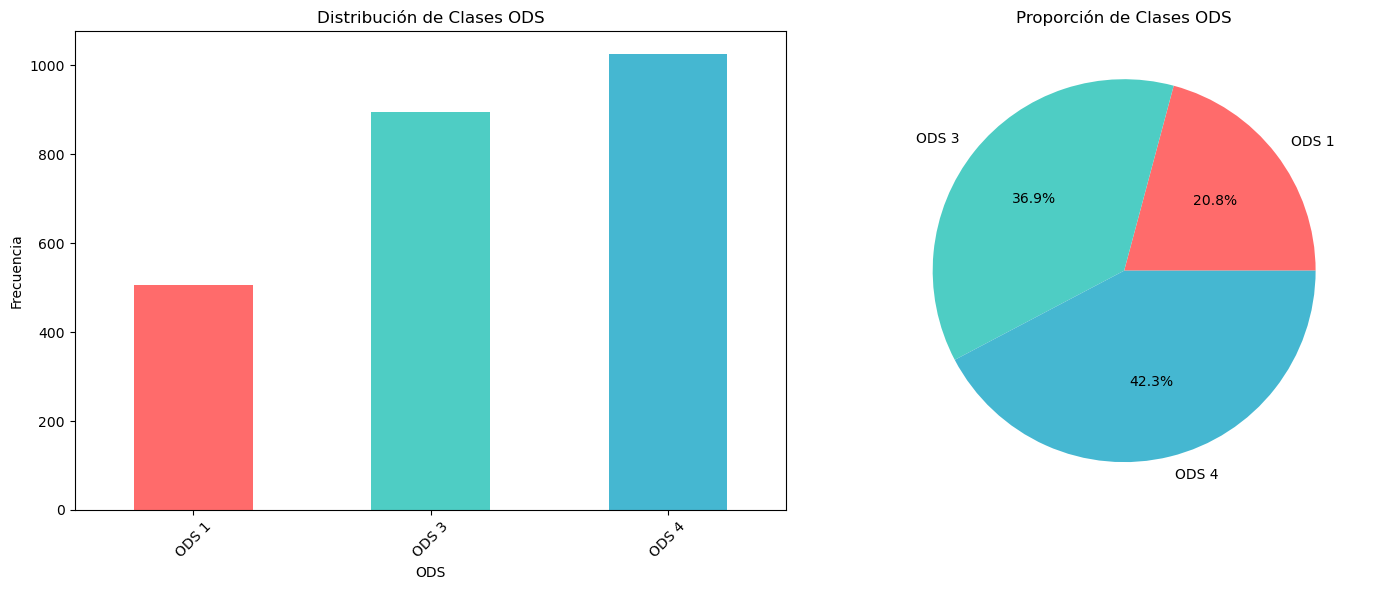


=== ANÁLISIS DE DESBALANCE ===
Clase mayoritaria: 1025 instancias
Clase minoritaria: 505 instancias
Ratio de desbalance: 2.03:1
Dataset desbalanceado detectado - Considerar técnicas de balanceo

=== ESTADÍSTICAS POR CLASE ===
ODS 1 - Fin de la pobreza: 505 textos (20.8%)
ODS 3 - Salud y bienestar: 894 textos (36.9%)
ODS 4 - Educación de calidad: 1025 textos (42.3%)


In [5]:
# Análisis de la distribución de clases
print("=== ANÁLISIS VARIABLE OBJETIVO: labels ===")

# Distribución de clases
distribucion_clases = datos_entrenamiento['labels'].value_counts().sort_index()
print("Distribución de clases:")
print(distribucion_clases)

# Porcentajes
porcentajes = datos_entrenamiento['labels'].value_counts(normalize=True).sort_index() * 100
print("\nPorcentajes:")
for label, porcentaje in porcentajes.items():
    print(f"ODS {label}: {porcentaje:.2f}%")

# Mapeo de labels a ODS
mapeo_ods = {
    1: "ODS 1 - Fin de la pobreza",
    3: "ODS 3 - Salud y bienestar", 
    4: "ODS 4 - Educación de calidad"
}

print("\n=== MAPEO DE CLASES ===")
for label, descripcion in mapeo_ods.items():
    if label in distribucion_clases.index:
        print(f"Label {label}: {descripcion} - {distribucion_clases[label]} textos")

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
labels_nombres = [f"ODS {label}" for label in distribucion_clases.index]
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1']
distribucion_clases.plot(kind='bar', ax=ax1, color=colores)
ax1.set_title('Distribución de Clases ODS')
ax1.set_xlabel('ODS')
ax1.set_ylabel('Frecuencia')
ax1.set_xticklabels(labels_nombres, rotation=45)

# Gráfico de pastel
ax2.pie(distribucion_clases.values, labels=labels_nombres, autopct='%1.1f%%', colors=colores)
ax2.set_title('Proporción de Clases ODS')

plt.tight_layout()
plt.show()

# Verificar desbalance de clases
clase_mayoritaria = distribucion_clases.max()
clase_minoritaria = distribucion_clases.min()
ratio_desbalance = clase_mayoritaria / clase_minoritaria

print(f"\n=== ANÁLISIS DE DESBALANCE ===")
print(f"Clase mayoritaria: {clase_mayoritaria} instancias")
print(f"Clase minoritaria: {clase_minoritaria} instancias")
print(f"Ratio de desbalance: {ratio_desbalance:.2f}:1")

if ratio_desbalance > 2:
    print("Dataset desbalanceado detectado - Considerar técnicas de balanceo")
else:
    print("Dataset relativamente balanceado")

# Estadísticas por clase
print(f"\n=== ESTADÍSTICAS POR CLASE ===")
for label in sorted(distribucion_clases.index):
    cantidad = distribucion_clases[label]
    porcentaje = porcentajes[label]
    print(f"{mapeo_ods[label]}: {cantidad} textos ({porcentaje:.1f}%)")

Los resultados del análisis de la variable objetivo muestran que el dataset está compuesto principalmente por textos asociados al ODS 4 (Educación de calidad, 42.3%), seguido por el ODS 3 (Salud y bienestar, 36.9%), mientras que el ODS 1 (Fin de la pobreza, 20.8%) representa la menor proporción. Este reparto genera un desbalance moderado de clases, con una relación aproximada de 2:1 entre la clase mayoritaria y la minoritaria. Aunque no es un desbalance extremo, sí es un factor a considerar, ya que puede ocasionar que los modelos tengan mayor facilidad para aprender patrones de las clases más representadas (educación y salud), mientras que la clase de pobreza corra el riesgo de ser subestimada en las predicciones.

En el siguiente bloque se analizarán las características de los textos del dataset de entrenamiento para comprender mejor su estructura y complejidad antes de aplicar técnicas de procesamiento de lenguaje natural. Primero, se calcularán estadísticas básicas como la longitud en caracteres, el número de palabras y el número de oraciones de cada texto, lo que permitirá entender la variabilidad en la extensión de las opiniones. Posteriormente, se generarán visualizaciones en forma de histogramas para observar la distribución de estas métricas, así como boxplots por clase ODS que ayudarán a identificar si existen diferencias significativas entre las categorías. También se obtendrán estadísticas resumidas por cada ODS, destacando promedios, longitudes mínimas y máximas, lo que dará una idea del rango de expresiones en cada temática. Además, se mostrarán ejemplos de los textos más cortos y más largos, junto con representaciones de cada clase, para ilustrar la diversidad de la información disponible. Finalmente, se calcularán las correlaciones entre las características textuales y se visualizarán en un mapa de calor, con el fin de identificar relaciones entre longitud, número de palabras, número de oraciones y las etiquetas ODS. Este análisis servirá como base para diseñar estrategias de preprocesamiento adecuadas

ANÁLISIS DE LA COLUMNA DE TEXTOS

=== ESTADÍSTICAS GENERALES ===



,longitud_texto,num_palabras,num_oraciones
count,2424.00,2424.00,2424.00
mean,683.22,107.92,4.90
std,223.56,35.58,1.25
min,303.00,41.00,1.00
25%,513.00,81.00,4.00
50%,647.00,102.00,5.00
75%,809.25,129.00,5.00
max,1492.00,260.00,17.00


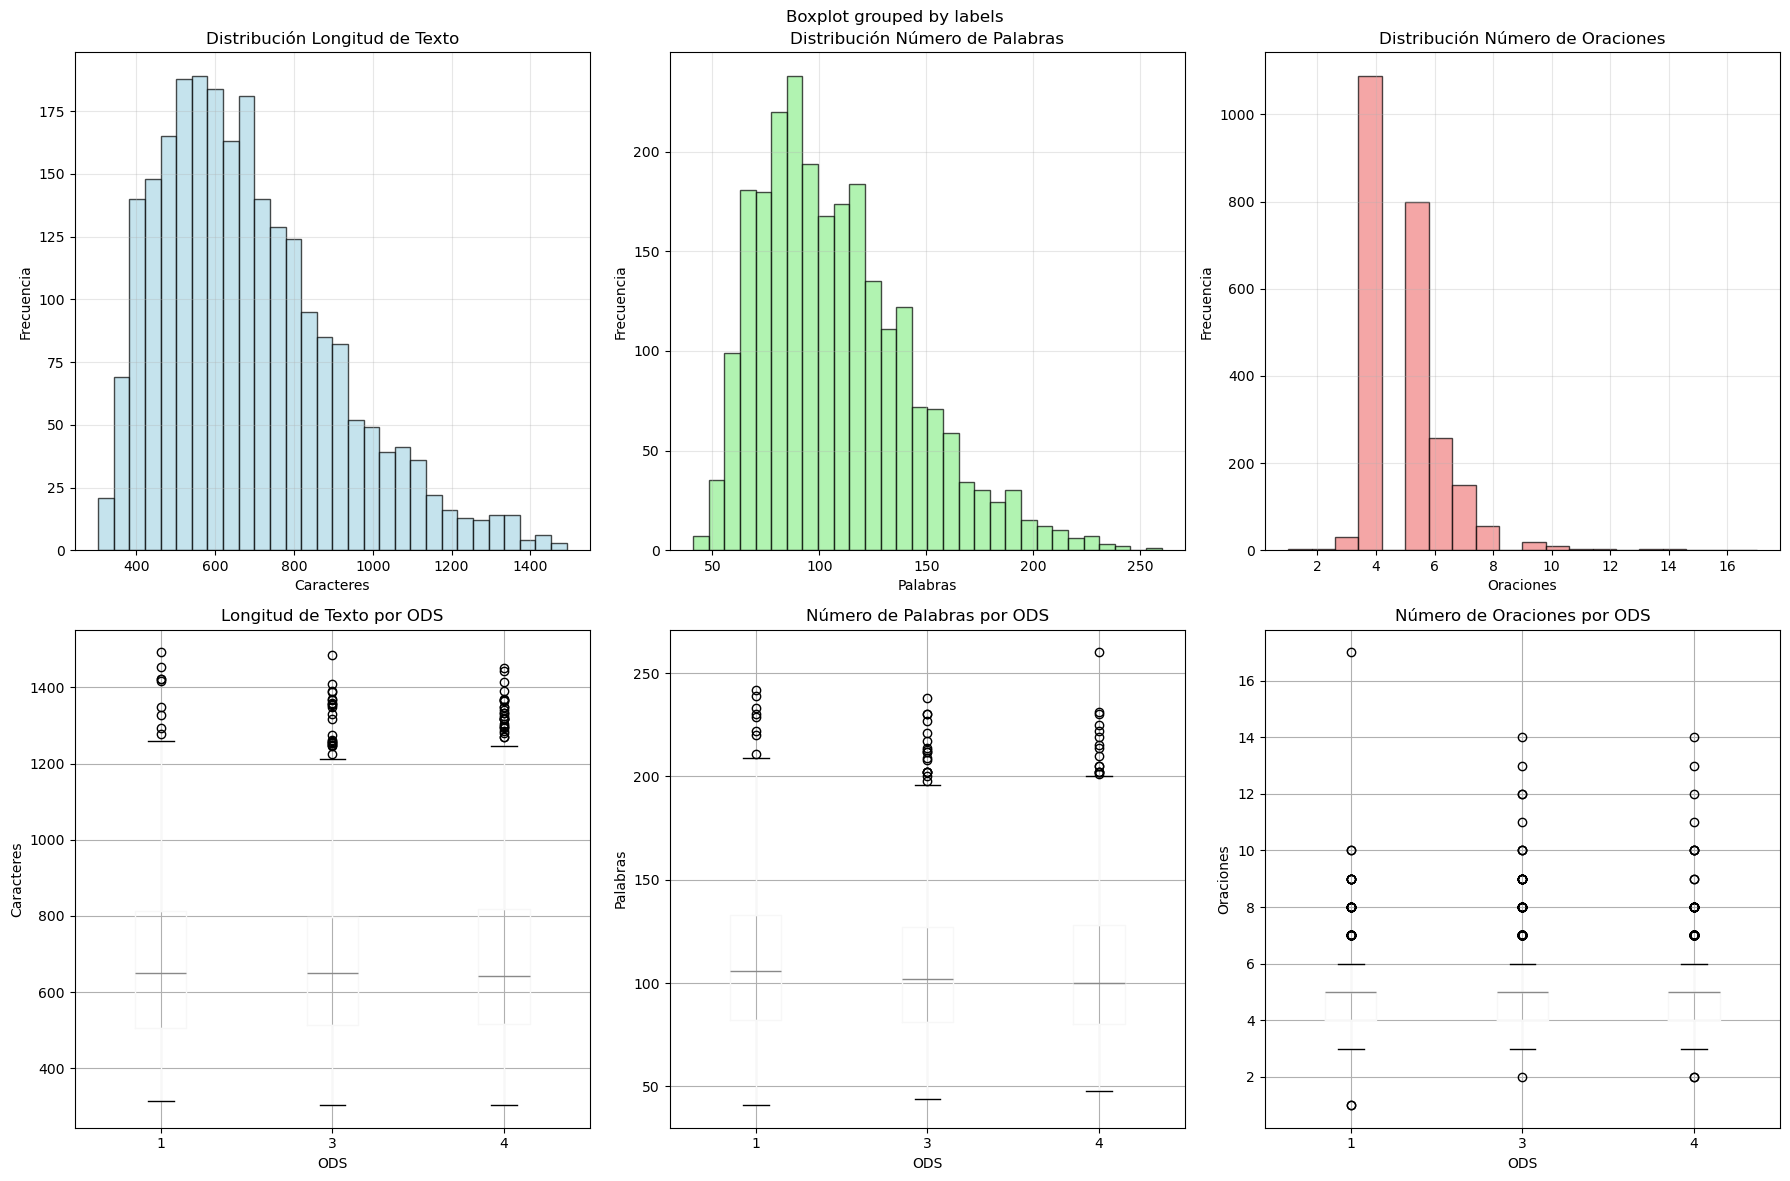


=== ESTADÍSTICAS POR CLASE ODS ===

ODS 1 - Fin de la pobreza:
  - Cantidad de textos: 505
  - Longitud promedio: 680.6 caracteres
  - Palabras promedio: 110.4 palabras
  - Oraciones promedio: 5.0 oraciones
  - Longitud mínima: 313 caracteres
  - Longitud máxima: 1492 caracteres

ODS 3 - Salud y bienestar:
  - Cantidad de textos: 894
  - Longitud promedio: 681.0 caracteres
  - Palabras promedio: 108.0 palabras
  - Oraciones promedio: 4.9 oraciones
  - Longitud mínima: 303 caracteres
  - Longitud máxima: 1486 caracteres

ODS 4 - Educación de calidad:
  - Cantidad de textos: 1025
  - Longitud promedio: 686.5 caracteres
  - Palabras promedio: 106.6 palabras
  - Oraciones promedio: 4.8 oraciones
  - Longitud mínima: 304 caracteres
  - Longitud máxima: 1452 caracteres

=== EJEMPLOS DE TEXTOS ===

Texto más corto:

Longitud: 303 caracteres
ODS: 3 (ODS 3 - Salud y bienestar)
Texto: En 2014, Bután fue testigo del mayor número de casos de drogas jamás registrado por las autoridades (644 casos)

,longitud_texto,num_palabras,num_oraciones,labels
longitud_texto,1.00,0.98,0.55,0.01
num_palabras,0.98,1.00,0.55,-0.04
num_oraciones,0.55,0.55,1.00,-0.04
labels,0.01,-0.04,-0.04,1.00


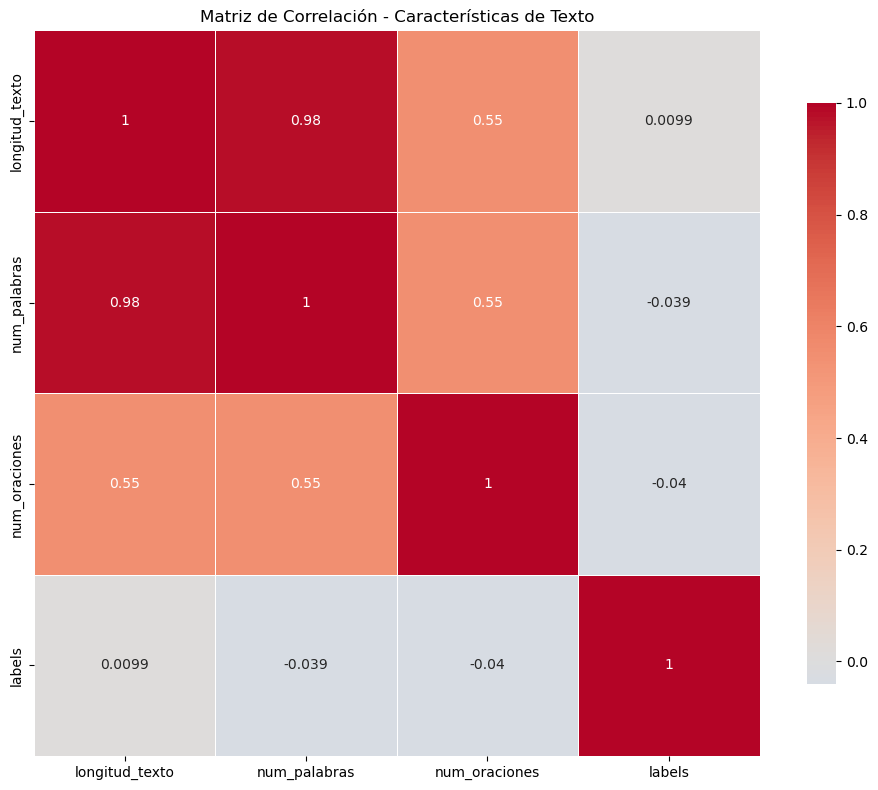

In [6]:
from IPython.display import display

print("="*60)
print("ANÁLISIS DE LA COLUMNA DE TEXTOS")
print("="*60 + "\n")

# Cálculo de estadísticas básicas
datos_entrenamiento['longitud_texto'] = datos_entrenamiento['textos'].astype(str).str.len()
datos_entrenamiento['num_palabras'] = datos_entrenamiento['textos'].astype(str).str.split().str.len()
datos_entrenamiento['num_oraciones'] = datos_entrenamiento['textos'].astype(str).str.count('\.') + 1

print("=== ESTADÍSTICAS GENERALES ===\n")
display(datos_entrenamiento[['longitud_texto', 'num_palabras', 'num_oraciones']].describe().round(2))

# Visualizaciones generales
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histograma longitud de texto
axes[0,0].hist(datos_entrenamiento['longitud_texto'], bins=30, alpha=0.7, 
               color='lightblue', edgecolor='black')
axes[0,0].set_title('Distribución Longitud de Texto')
axes[0,0].set_xlabel('Caracteres'); axes[0,0].set_ylabel('Frecuencia')
axes[0,0].grid(True, alpha=0.3)

# Histograma número de palabras
axes[0,1].hist(datos_entrenamiento['num_palabras'], bins=30, alpha=0.7, 
               color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribución Número de Palabras')
axes[0,1].set_xlabel('Palabras'); axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

# Histograma número de oraciones
axes[0,2].hist(datos_entrenamiento['num_oraciones'], bins=20, alpha=0.7, 
               color='lightcoral', edgecolor='black')
axes[0,2].set_title('Distribución Número de Oraciones')
axes[0,2].set_xlabel('Oraciones'); axes[0,2].set_ylabel('Frecuencia')
axes[0,2].grid(True, alpha=0.3)

# Box plots por clase ODS
datos_entrenamiento.boxplot(column='longitud_texto', by='labels', ax=axes[1,0])
axes[1,0].set_title('Longitud de Texto por ODS')
axes[1,0].set_xlabel('ODS'); axes[1,0].set_ylabel('Caracteres')

datos_entrenamiento.boxplot(column='num_palabras', by='labels', ax=axes[1,1])
axes[1,1].set_title('Número de Palabras por ODS')
axes[1,1].set_xlabel('ODS'); axes[1,1].set_ylabel('Palabras')

datos_entrenamiento.boxplot(column='num_oraciones', by='labels', ax=axes[1,2])
axes[1,2].set_title('Número de Oraciones por ODS')
axes[1,2].set_xlabel('ODS'); axes[1,2].set_ylabel('Oraciones')

plt.tight_layout()
plt.show()

# Estadísticas por clase ODS
mapeo_ods = {
    1: "ODS 1 - Fin de la pobreza",
    3: "ODS 3 - Salud y bienestar", 
    4: "ODS 4 - Educación de calidad"
}

print("\n=== ESTADÍSTICAS POR CLASE ODS ===\n")
for label in sorted(datos_entrenamiento['labels'].unique()):
    subset = datos_entrenamiento[datos_entrenamiento['labels'] == label]
    print(f"{mapeo_ods[label]}:")
    print(f"  - Cantidad de textos: {len(subset)}")
    print(f"  - Longitud promedio: {subset['longitud_texto'].mean():.1f} caracteres")
    print(f"  - Palabras promedio: {subset['num_palabras'].mean():.1f} palabras")
    print(f"  - Oraciones promedio: {subset['num_oraciones'].mean():.1f} oraciones")
    print(f"  - Longitud mínima: {subset['longitud_texto'].min()} caracteres")
    print(f"  - Longitud máxima: {subset['longitud_texto'].max()} caracteres\n")

# Ejemplos de textos por clase y longitud
print("=== EJEMPLOS DE TEXTOS ===\n")

# Texto más corto y más largo general
idx_corto = datos_entrenamiento['longitud_texto'].idxmin()
idx_largo = datos_entrenamiento['longitud_texto'].idxmax()

print("Texto más corto:\n")
print(f"Longitud: {datos_entrenamiento.loc[idx_corto, 'longitud_texto']} caracteres")
print(f"ODS: {datos_entrenamiento.loc[idx_corto, 'labels']} ({mapeo_ods[datos_entrenamiento.loc[idx_corto, 'labels']]})")
print(f"Texto: {datos_entrenamiento.loc[idx_corto, 'textos']}\n")

print("Texto más largo:\n")
print(f"Longitud: {datos_entrenamiento.loc[idx_largo, 'longitud_texto']} caracteres")
print(f"ODS: {datos_entrenamiento.loc[idx_largo, 'labels']} ({mapeo_ods[datos_entrenamiento.loc[idx_largo, 'labels']]})")
print(f"Texto: {datos_entrenamiento.loc[idx_largo, 'textos'][:300]}...\n")

# Ejemplo de texto por cada ODS
print("=== EJEMPLOS POR CLASE ODS ===\n")
for label in sorted(datos_entrenamiento['labels'].unique()):
    subset = datos_entrenamiento[datos_entrenamiento['labels'] == label]
    ejemplo_idx = subset.index[0]
    print(f"{mapeo_ods[label]}:")
    print(f"  Longitud: {datos_entrenamiento.loc[ejemplo_idx, 'longitud_texto']} caracteres")
    print(f"  Ejemplo: {datos_entrenamiento.loc[ejemplo_idx, 'textos'][:250]}...\n")

# Análisis de correlación entre características de texto
print("=== CORRELACIÓN ENTRE CARACTERÍSTICAS ===\n")
correlacion = datos_entrenamiento[['longitud_texto', 'num_palabras', 'num_oraciones', 'labels']].corr()
display(correlacion.round(2))

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Características de Texto')
plt.tight_layout()
plt.show()


El análisis de la columna de textos permitió caracterizar la estructura general del dataset y resaltar patrones interesantes. En primer lugar, se observó que los textos tienen en promedio entre 650 y 680 caracteres y alrededor de 108 palabras, distribuidos en unas 5 oraciones, lo que refleja una extensión relativamente homogénea. Sin embargo, el rango de longitudes muestra una variabilidad considerable, con casos muy cortos (≈300 caracteres) y otros mucho más extensos (hasta 1490). Los histogramas y boxplots confirmaron que, aunque la mayoría de los textos se concentran en longitudes intermedias, existen outliers significativos que se deben tener en cuenta. Al comparar entre ODS, las diferencias son mínimas: las tres categorías mantienen promedios similares, lo que sugiere que la longitud del texto no es un factor diferenciador fuerte entre clases. El análisis de correlación mostró una relación casi perfecta entre la longitud del texto y el número de palabras (≈ 0.98), lo cual es esperado ya que ambas métricas están directamente relacionadas. En contraste, la correlación con el número de oraciones es moderada (≈0.55) y, de forma importante, las correlaciones con las etiquetas son prácticamente nulas, lo que evidencia que las características puramente estructurales del texto no son determinantes para clasificar los ODS. Esto refuerza la necesidad de aplicar técnicas de representación semántica como Bag of Words, capaces de capturar el contenido y no solo la forma de los textos.

En el siguiente bloque se llevará a cabo la detección de outliers en las características de los textos, utilizando el método del rango intercuartílico (IQR). Para cada variable (longitud de texto, número de palabras y número de oraciones) se calcularán los cuartiles, el rango esperado y los valores que se encuentran por fuera de estos límites. Esto permitirá identificar textos que por su extensión o estructura difieren significativamente del resto del conjunto de datos. Posteriormente, se generará un resumen del número total de outliers y su proporción dentro del dataset, además de analizar cómo se distribuyen en cada una de las clases ODS. También se presentarán visualizaciones de tipo boxplot y scatter plot para observar gráficamente estos casos extremos y su relación con las demás variables. Finalmente, se mostrarán ejemplos concretos de textos que corresponden a los outliers más extremos, lo que permitirá tener un entendimiento cualitativo de estas anomalías antes de decidir si deben corregirse, excluirse o mantenerse en el análisis.

=== DETECCIÓN DE OUTLIERS ===

Longitud de texto
----------------------------------------
Q1: 513.0, Q3: 809.2, IQR: 296.2
Rango esperado: [68.6, 1253.6]
Outliers detectados: 54 (2.23% del total)
Valores extremos -> Min: 1254.0, Max: 1492.0

Número de palabras
----------------------------------------
Q1: 81.0, Q3: 129.0, IQR: 48.0
Rango esperado: [9.0, 201.0]
Outliers detectados: 41 (1.69% del total)
Valores extremos -> Min: 202.0, Max: 260.0

Número de oraciones
----------------------------------------
Q1: 4.0, Q3: 5.0, IQR: 1.0
Rango esperado: [2.5, 6.5]
Outliers detectados: 250 (10.31% del total)
Valores extremos -> Min: 1.0, Max: 17.0

=== RESUMEN DE OUTLIERS ===
Total de registros con outliers: 267
Porcentaje del dataset: 11.01%

=== DISTRIBUCIÓN DE OUTLIERS POR CLASE ===
ODS 1 - Fin de la pobreza: 64/505 (12.7%)
ODS 3 - Salud y bienestar: 105/894 (11.7%)
ODS 4 - Educación de calidad: 98/1025 (9.6%)



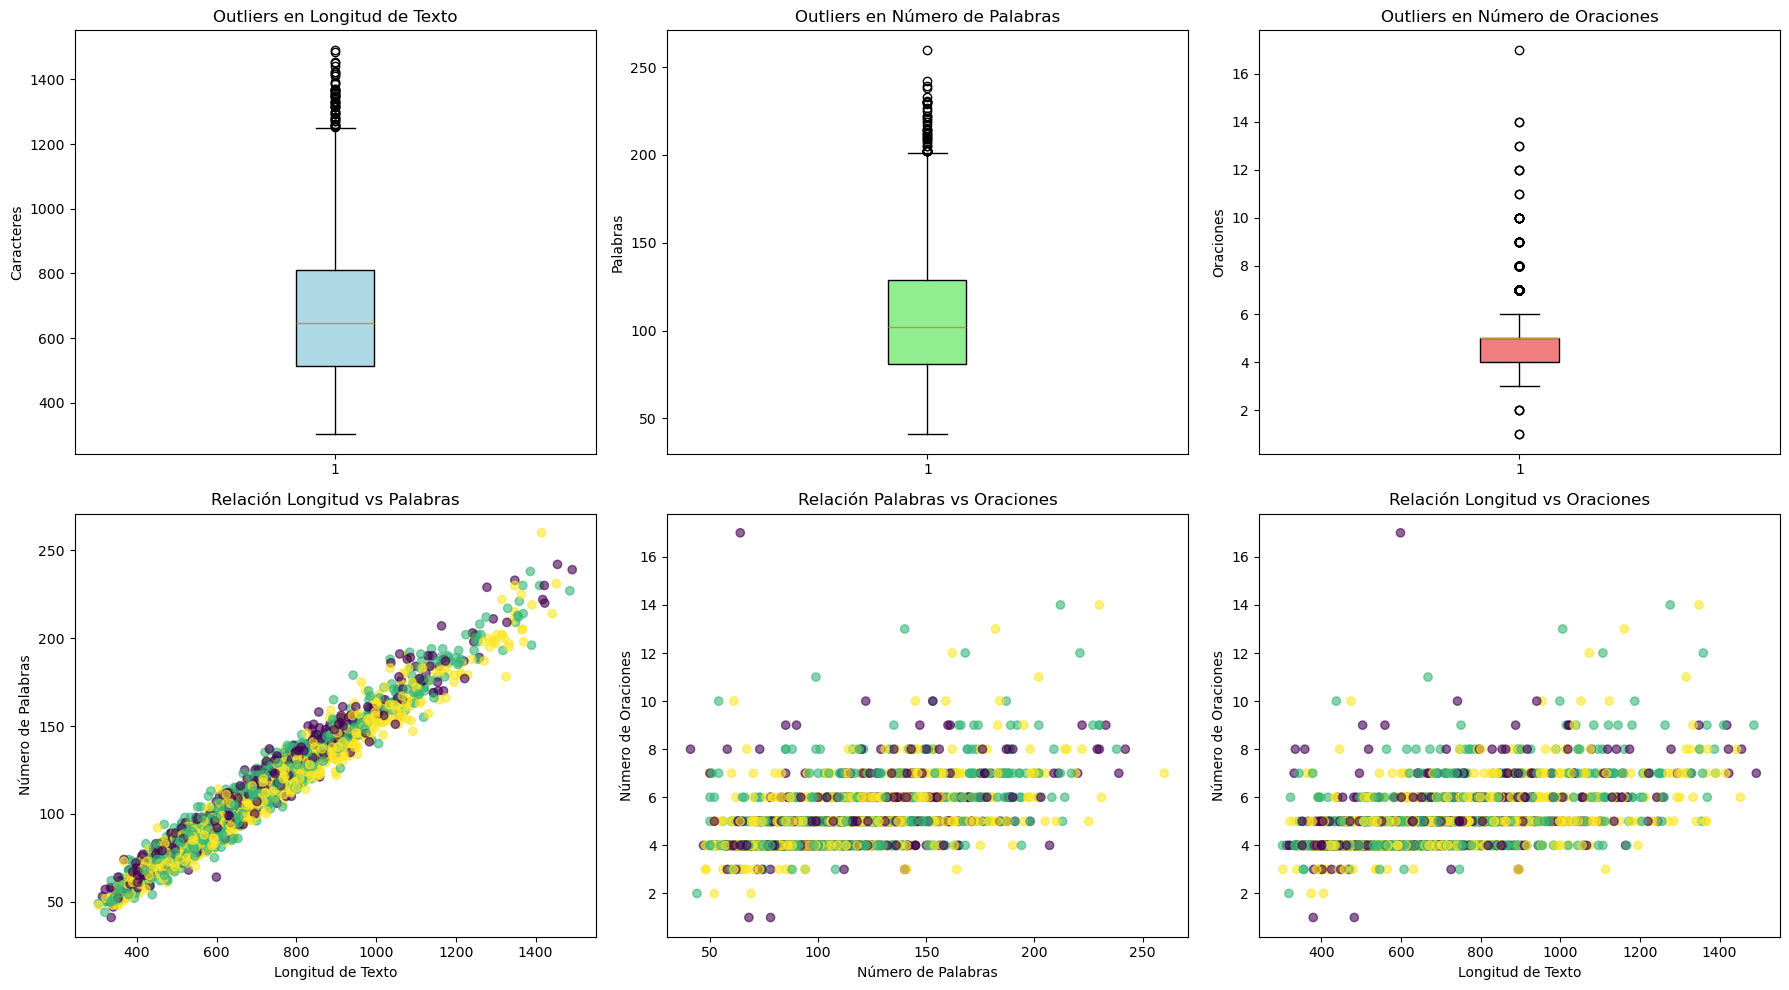


=== EJEMPLOS DE OUTLIERS ===

OUTLIER - Mayor longitud (índice 2272)
ODS: ODS 1 - Fin de la pobreza
Longitud: 1492 caracteres
Texto: A medida que la propiedad de la vivienda se vuelve más inaccesible para las familias en el extremo inferior de la distribución socioeconómica, las intervenciones de políticas de vivienda deben centrar...

OUTLIER - Mayor número de palabras (índice 1015)
ODS: ODS 4 - Educación de calidad
Palabras: 260
Texto: El cuarenta y tres por ciento de las personas de 25 a 34 años han completado la educación secundaria (en comparación con el promedio de la OCDE del 82 %) y el 19 % han obtenido la educación terciaria ...

OUTLIER - Mayor número de oraciones (índice 631)
ODS: ODS 1 - Fin de la pobreza
Oraciones: 17
Texto: Hijos de la austeridad: impacto de la gran recesión en la pobreza infantil en los países ricos, Oxford University Press, http://dx.doi.org/10.1093/oso/9780198797968.003.0012. ¡La Geografía de la I5 In...


In [7]:
# ============================================
# Detección de outliers en características de texto
# ============================================

print("=== DETECCIÓN DE OUTLIERS ===\n")

def detectar_outliers_iqr(serie, nombre):
    """Detecta outliers en una serie usando el método IQR."""
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    
    print(f"{nombre}")
    print("-" * 40)
    print(f"Q1: {Q1:.1f}, Q3: {Q3:.1f}, IQR: {IQR:.1f}")
    print(f"Rango esperado: [{limite_inferior:.1f}, {limite_superior:.1f}]")
    print(f"Outliers detectados: {len(outliers)} "
          f"({len(outliers)/len(serie)*100:.2f}% del total)")
    
    if len(outliers) > 0:
        print(f"Valores extremos -> Min: {outliers.min():.1f}, "
              f"Max: {outliers.max():.1f}")
    print()
    
    return outliers.index.tolist()

# Detectar outliers en cada métrica
outliers_longitud = detectar_outliers_iqr(datos_entrenamiento['longitud_texto'], "Longitud de texto")
outliers_palabras = detectar_outliers_iqr(datos_entrenamiento['num_palabras'], "Número de palabras")
outliers_oraciones = detectar_outliers_iqr(datos_entrenamiento['num_oraciones'], "Número de oraciones")

# Resumen de outliers
outliers_combinados = list(set(outliers_longitud + outliers_palabras + outliers_oraciones))
print("=== RESUMEN DE OUTLIERS ===")
print(f"Total de registros con outliers: {len(outliers_combinados)}")
print(f"Porcentaje del dataset: {len(outliers_combinados)/len(datos_entrenamiento)*100:.2f}%\n")

# Distribución de outliers por clase
print("=== DISTRIBUCIÓN DE OUTLIERS POR CLASE ===")
if len(outliers_combinados) > 0:
    outliers_por_clase = datos_entrenamiento.loc[outliers_combinados, 'labels'].value_counts().sort_index()
    for label in sorted(datos_entrenamiento['labels'].unique()):
        total_clase = len(datos_entrenamiento[datos_entrenamiento['labels'] == label])
        outliers_clase = outliers_por_clase.get(label, 0)
        porcentaje = (outliers_clase / total_clase) * 100
        print(f"{mapeo_ods[label]}: {outliers_clase}/{total_clase} "
              f"({porcentaje:.1f}%)")
print()

# Visualización de outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Boxplots
axes[0,0].boxplot(datos_entrenamiento['longitud_texto'], patch_artist=True, 
                  boxprops=dict(facecolor='lightblue'))
axes[0,0].set_title('Outliers en Longitud de Texto')
axes[0,0].set_ylabel('Caracteres')

axes[0,1].boxplot(datos_entrenamiento['num_palabras'], patch_artist=True,
                  boxprops=dict(facecolor='lightgreen'))
axes[0,1].set_title('Outliers en Número de Palabras')
axes[0,1].set_ylabel('Palabras')

axes[0,2].boxplot(datos_entrenamiento['num_oraciones'], patch_artist=True,
                  boxprops=dict(facecolor='lightcoral'))
axes[0,2].set_title('Outliers en Número de Oraciones')
axes[0,2].set_ylabel('Oraciones')

# Scatter plots
axes[1,0].scatter(datos_entrenamiento['longitud_texto'], datos_entrenamiento['num_palabras'], 
                  alpha=0.6, c=datos_entrenamiento['labels'], cmap='viridis')
axes[1,0].set_title('Relación Longitud vs Palabras')
axes[1,0].set_xlabel('Longitud de Texto')
axes[1,0].set_ylabel('Número de Palabras')

axes[1,1].scatter(datos_entrenamiento['num_palabras'], datos_entrenamiento['num_oraciones'], 
                  alpha=0.6, c=datos_entrenamiento['labels'], cmap='viridis')
axes[1,1].set_title('Relación Palabras vs Oraciones')
axes[1,1].set_xlabel('Número de Palabras')
axes[1,1].set_ylabel('Número de Oraciones')

axes[1,2].scatter(datos_entrenamiento['longitud_texto'], datos_entrenamiento['num_oraciones'], 
                  alpha=0.6, c=datos_entrenamiento['labels'], cmap='viridis')
axes[1,2].set_title('Relación Longitud vs Oraciones')
axes[1,2].set_xlabel('Longitud de Texto')
axes[1,2].set_ylabel('Número de Oraciones')

plt.tight_layout()
plt.show()

# Ejemplos de outliers extremos
if len(outliers_combinados) > 0:
    print("\n=== EJEMPLOS DE OUTLIERS ===")
    
    if len(outliers_longitud) > 0:
        idx_max_longitud = datos_entrenamiento.loc[outliers_longitud, 'longitud_texto'].idxmax()
        print(f"\nOUTLIER - Mayor longitud (índice {idx_max_longitud})")
        print(f"ODS: {mapeo_ods[datos_entrenamiento.loc[idx_max_longitud, 'labels']]}")
        print(f"Longitud: {datos_entrenamiento.loc[idx_max_longitud, 'longitud_texto']} caracteres")
        print(f"Texto: {datos_entrenamiento.loc[idx_max_longitud, 'textos'][:200]}...")

    if len(outliers_palabras) > 0:
        idx_max_palabras = datos_entrenamiento.loc[outliers_palabras, 'num_palabras'].idxmax()
        print(f"\nOUTLIER - Mayor número de palabras (índice {idx_max_palabras})")
        print(f"ODS: {mapeo_ods[datos_entrenamiento.loc[idx_max_palabras, 'labels']]}")
        print(f"Palabras: {datos_entrenamiento.loc[idx_max_palabras, 'num_palabras']}")
        print(f"Texto: {datos_entrenamiento.loc[idx_max_palabras, 'textos'][:200]}...")

    if len(outliers_oraciones) > 0:
        idx_max_oraciones = datos_entrenamiento.loc[outliers_oraciones, 'num_oraciones'].idxmax()
        print(f"\nOUTLIER - Mayor número de oraciones (índice {idx_max_oraciones})")
        print(f"ODS: {mapeo_ods[datos_entrenamiento.loc[idx_max_oraciones, 'labels']]}")
        print(f"Oraciones: {datos_entrenamiento.loc[idx_max_oraciones, 'num_oraciones']}")
        print(f"Texto: {datos_entrenamiento.loc[idx_max_oraciones, 'textos'][:200]}...")


El análisis de outliers evidenció que aproximadamente un 11% del dataset presenta valores atípicos, siendo más frecuentes en la variable de número de oraciones (10.3% de los textos), en comparación con longitud de texto (2.2%) y número de palabras (1.7%). Estos casos extremos corresponden a textos inusualmente largos o muy fragmentados en oraciones, lo cual puede reflejar diferencias en el estilo de redacción o en la complejidad del contenido. Al revisar la distribución por clase, se observó que los outliers afectan de manera similar a los tres ODS, aunque con una ligera mayor incidencia en los textos asociados al ODS 1 (Fin de la pobreza, 12.7%). Si bien la proporción de anomalías no es excesivamente alta, es relevante considerar su impacto, ya que estos registros podrían influir en el desempeño de los modelos de clasificación, haciéndolos más sensibles a textos muy particulares.

El siguiente bloque de código realiza un análisis exploratorio detallado del dataset de prueba, comparándolo con el dataset de entrenamiento para evaluar su consistencia y compatibilidad. En primer lugar, se calculan estadísticas básicas del conjunto de prueba, incluyendo longitud de texto, número de palabras y número de oraciones. Posteriormente, se construye una tabla comparativa de medias y desviaciones estándar entre ambos datasets, complementada con diferencias porcentuales que permiten cuantificar el grado de similitud o desviación entre ellos. Además, se generan visualizaciones comparativas (histogramas y boxplots) que permiten observar la distribución de características entre entrenamiento y prueba.

El bloque también implementa la detección de outliers en el dataset de prueba, usando como referencia los límites obtenidos del dataset de entrenamiento, lo cual garantiza una comparación justa bajo los mismos criterios. A continuación, se muestran ejemplos representativos del conjunto de prueba, destacando tanto los textos más cortos como los más largos. Finalmente, se incluye una evaluación de compatibilidad entre ambos datasets, verificando si las longitudes y número de palabras del conjunto de prueba se encuentran dentro del rango observado en entrenamiento, y se cierra con un resumen final del análisis exploratorio, que sintetiza las características principales, el desbalance de clases y el nivel de compatibilidad entre los conjuntos.


ANÁLISIS DEL DATASET DE PRUEBA

=== ESTADÍSTICAS GENERALES DEL DATASET DE PRUEBA ===



,longitud_texto,num_palabras,num_oraciones
count,152.00,152.00,152.00
mean,677.64,108.07,4.93
std,218.68,33.88,1.21
min,340.00,53.00,4.00
25%,521.00,85.50,4.00
50%,619.50,100.50,5.00
75%,817.50,126.25,5.00
max,1298.00,210.00,10.00



=== COMPARACIÓN ENTRE ENTRENAMIENTO Y PRUEBA ===



,Media Entrenamiento,Media Prueba,Std Entrenamiento,Std Prueba
Longitud (caracteres),683.22,677.64,223.56,218.68
Número de palabras,107.92,108.07,35.58,33.88
Número de oraciones,4.90,4.93,1.25,1.21



=== DIFERENCIAS PORCENTUALES (Prueba vs Entrenamiento) ===

- longitud_texto: -0.82%
- num_palabras: +0.13%
- num_oraciones: +0.66%

=== VISUALIZACIONES COMPARATIVAS ===



/var/folders/z8/lmpjs70n0pqb2zr2p7c930g00000gn/T/ipykernel_58946/2877221697.py:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(data_longitud, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
/var/folders/z8/lmpjs70n0pqb2zr2p7c930g00000gn/T/ipykernel_58946/2877221697.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(data_palabras, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
/var/folders/z8/lmpjs70n0pqb2zr2p7c930g00000gn/T/ipykernel_58946/2877221697.py:95: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,2].boxplot(data_oraciones, labels=['Entrenamiento', 'Pr

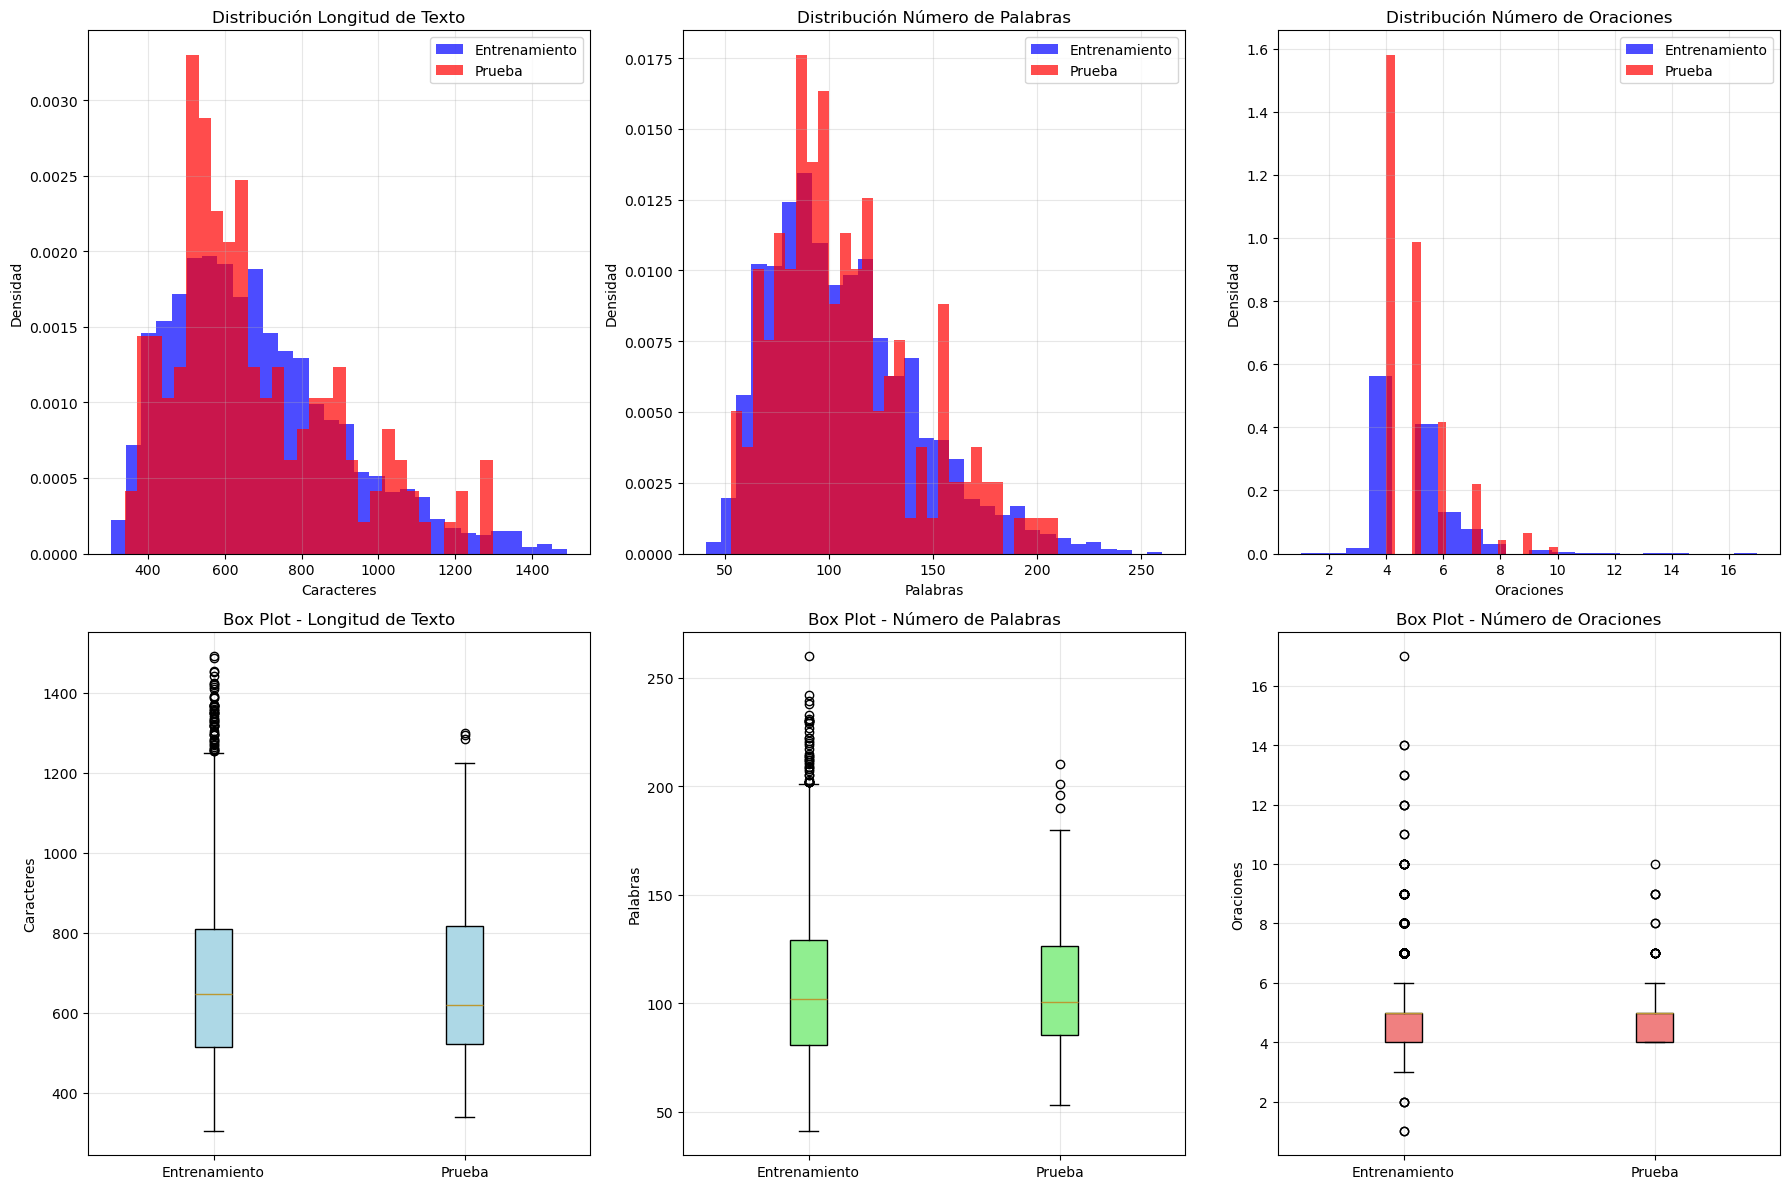


=== OUTLIERS EN DATASET DE PRUEBA ===

→ Longitud de texto: 3 outliers detectados (1.97%)
   Rango outliers: Min 1285.0, Max 1298.0
→ Número de palabras: 1 outliers detectados (0.66%)
   Rango outliers: Min 210.0, Max 210.0
→ Número de oraciones: 16 outliers detectados (10.53%)
   Rango outliers: Min 7.0, Max 10.0

=== EJEMPLOS DATASET DE PRUEBA ===

Texto 1:
  Longitud: 651 caracteres
  Palabras: 98 | Oraciones: 5
  Texto: El rector, que es el representante local del Ministerio de Educación, tiene la responsabilidad principal de procesar la evaluación. A pesar de esta centralización, el sistema francés se basa en gran m...

Texto 2:
  Longitud: 419 caracteres
  Palabras: 57 | Oraciones: 4
  Texto: Tenga en cuenta que todos los programas antipobreza tienen condiciones, incluso aquellos caracterizados como 'incondicionales'. Nuestro enfoque está en las condiciones de comportamiento vinculadas a l...

Texto 3:
  Longitud: 559 caracteres
  Palabras: 93 | Oraciones: 6
  Texto: Debido a qu

In [8]:
from IPython.display import display

print("\n" + "="*50)
print("ANÁLISIS DEL DATASET DE PRUEBA")
print("="*50 + "\n")

# Estadísticas básicas del dataset de prueba
datos_prueba['longitud_texto'] = datos_prueba['Textos_espanol'].astype(str).str.len()
datos_prueba['num_palabras'] = datos_prueba['Textos_espanol'].astype(str).str.split().str.len()
datos_prueba['num_oraciones'] = datos_prueba['Textos_espanol'].astype(str).str.count('\.') + 1

print("=== ESTADÍSTICAS GENERALES DEL DATASET DE PRUEBA ===\n")
display(datos_prueba[['longitud_texto', 'num_palabras', 'num_oraciones']].describe().round(2))

# Comparación entre datasets de entrenamiento y prueba
print("\n=== COMPARACIÓN ENTRE ENTRENAMIENTO Y PRUEBA ===\n")
comparacion = pd.DataFrame({
    'Media Entrenamiento': [
        datos_entrenamiento['longitud_texto'].mean(),
        datos_entrenamiento['num_palabras'].mean(),
        datos_entrenamiento['num_oraciones'].mean()
    ],
    'Media Prueba': [
        datos_prueba['longitud_texto'].mean(),
        datos_prueba['num_palabras'].mean(),
        datos_prueba['num_oraciones'].mean()
    ],
    'Std Entrenamiento': [
        datos_entrenamiento['longitud_texto'].std(),
        datos_entrenamiento['num_palabras'].std(),
        datos_entrenamiento['num_oraciones'].std()
    ],
    'Std Prueba': [
        datos_prueba['longitud_texto'].std(),
        datos_prueba['num_palabras'].std(),
        datos_prueba['num_oraciones'].std()
    ]
}, index=['Longitud (caracteres)', 'Número de palabras', 'Número de oraciones'])

display(comparacion.round(2))

# Diferencias porcentuales
print("\n=== DIFERENCIAS PORCENTUALES (Prueba vs Entrenamiento) ===\n")
for caracteristica in ['longitud_texto', 'num_palabras', 'num_oraciones']:
    media_entreno = datos_entrenamiento[caracteristica].mean()
    media_prueba = datos_prueba[caracteristica].mean()
    diferencia_pct = ((media_prueba - media_entreno) / media_entreno) * 100
    print(f"- {caracteristica}: {diferencia_pct:+.2f}%")

# Visualización comparativa
print("\n=== VISUALIZACIONES COMPARATIVAS ===\n")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Comparación de longitud de texto
axes[0,0].hist(datos_entrenamiento['longitud_texto'], bins=30, alpha=0.7, 
               label='Entrenamiento', color='blue', density=True)
axes[0,0].hist(datos_prueba['longitud_texto'], bins=30, alpha=0.7, 
               label='Prueba', color='red', density=True)
axes[0,0].set_title('Distribución Longitud de Texto')
axes[0,0].set_xlabel('Caracteres'); axes[0,0].set_ylabel('Densidad')
axes[0,0].legend(); axes[0,0].grid(True, alpha=0.3)

# Comparación de número de palabras
axes[0,1].hist(datos_entrenamiento['num_palabras'], bins=30, alpha=0.7, 
               label='Entrenamiento', color='blue', density=True)
axes[0,1].hist(datos_prueba['num_palabras'], bins=30, alpha=0.7, 
               label='Prueba', color='red', density=True)
axes[0,1].set_title('Distribución Número de Palabras')
axes[0,1].set_xlabel('Palabras'); axes[0,1].set_ylabel('Densidad')
axes[0,1].legend(); axes[0,1].grid(True, alpha=0.3)

# Comparación de número de oraciones
axes[0,2].hist(datos_entrenamiento['num_oraciones'], bins=20, alpha=0.7, 
               label='Entrenamiento', color='blue', density=True)
axes[0,2].hist(datos_prueba['num_oraciones'], bins=20, alpha=0.7, 
               label='Prueba', color='red', density=True)
axes[0,2].set_title('Distribución Número de Oraciones')
axes[0,2].set_xlabel('Oraciones'); axes[0,2].set_ylabel('Densidad')
axes[0,2].legend(); axes[0,2].grid(True, alpha=0.3)

# Box plots comparativos
data_longitud = [datos_entrenamiento['longitud_texto'], datos_prueba['longitud_texto']]
axes[1,0].boxplot(data_longitud, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
                  boxprops=dict(facecolor='lightblue'))
axes[1,0].set_title('Box Plot - Longitud de Texto'); axes[1,0].set_ylabel('Caracteres')
axes[1,0].grid(True, alpha=0.3)

data_palabras = [datos_entrenamiento['num_palabras'], datos_prueba['num_palabras']]
axes[1,1].boxplot(data_palabras, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
                  boxprops=dict(facecolor='lightgreen'))
axes[1,1].set_title('Box Plot - Número de Palabras'); axes[1,1].set_ylabel('Palabras')
axes[1,1].grid(True, alpha=0.3)

data_oraciones = [datos_entrenamiento['num_oraciones'], datos_prueba['num_oraciones']]
axes[1,2].boxplot(data_oraciones, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
                  boxprops=dict(facecolor='lightcoral'))
axes[1,2].set_title('Box Plot - Número de Oraciones'); axes[1,2].set_ylabel('Oraciones')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de outliers en dataset de prueba
print("\n=== OUTLIERS EN DATASET DE PRUEBA ===\n")

def detectar_outliers_prueba(serie, nombre, limites_entrenamiento=None):
    """Detecta outliers en dataset de prueba usando límites del entrenamiento"""
    if limites_entrenamiento:
        limite_inf, limite_sup = limites_entrenamiento
        outliers = serie[(serie < limite_inf) | (serie > limite_sup)]
    else:
        Q1 = serie.quantile(0.25); Q3 = serie.quantile(0.75)
        IQR = Q3 - Q1
        limite_inf = Q1 - 1.5 * IQR; limite_sup = Q3 + 1.5 * IQR
        outliers = serie[(serie < limite_inf) | (serie > limite_sup)]
    
    print(f"→ {nombre}: {len(outliers)} outliers detectados ({len(outliers)/len(serie)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"   Rango outliers: Min {outliers.min():.1f}, Max {outliers.max():.1f}")
    
    return outliers.index.tolist()

# Límites del entrenamiento
Q1_long, Q3_long = datos_entrenamiento['longitud_texto'].quantile([0.25, 0.75])
IQR_long = Q3_long - Q1_long
limites_longitud = (Q1_long - 1.5*IQR_long, Q3_long + 1.5*IQR_long)

Q1_pal, Q3_pal = datos_entrenamiento['num_palabras'].quantile([0.25, 0.75])
IQR_pal = Q3_pal - Q1_pal
limites_palabras = (Q1_pal - 1.5*IQR_pal, Q3_pal + 1.5*IQR_pal)

Q1_or, Q3_or = datos_entrenamiento['num_oraciones'].quantile([0.25, 0.75])
IQR_or = Q3_or - Q1_or
limites_oraciones = (Q1_or - 1.5*IQR_or, Q3_or + 1.5*IQR_or)

outliers_prueba_long = detectar_outliers_prueba(datos_prueba['longitud_texto'], 'Longitud de texto', limites_longitud)
outliers_prueba_pal = detectar_outliers_prueba(datos_prueba['num_palabras'], 'Número de palabras', limites_palabras)
outliers_prueba_or = detectar_outliers_prueba(datos_prueba['num_oraciones'], 'Número de oraciones', limites_oraciones)

# Ejemplos del dataset de prueba
print("\n=== EJEMPLOS DATASET DE PRUEBA ===\n")
for i in range(min(3, len(datos_prueba))):
    print(f"Texto {i+1}:")
    print(f"  Longitud: {datos_prueba.loc[i, 'longitud_texto']} caracteres")
    print(f"  Palabras: {datos_prueba.loc[i, 'num_palabras']} | Oraciones: {datos_prueba.loc[i, 'num_oraciones']}")
    print(f"  Texto: {datos_prueba.loc[i, 'Textos_espanol'][:200]}...\n")

# Texto más largo y más corto del dataset de prueba
idx_corto_prueba = datos_prueba['longitud_texto'].idxmin()
idx_largo_prueba = datos_prueba['longitud_texto'].idxmax()

print("=== TEXTO MÁS CORTO EN PRUEBA ===")
print(f"Longitud: {datos_prueba.loc[idx_corto_prueba, 'longitud_texto']} caracteres")
print(f"Texto: {datos_prueba.loc[idx_corto_prueba, 'Textos_espanol']}\n")

print("=== TEXTO MÁS LARGO EN PRUEBA ===")
print(f"Longitud: {datos_prueba.loc[idx_largo_prueba, 'longitud_texto']} caracteres")
print(f"Texto: {datos_prueba.loc[idx_largo_prueba, 'Textos_espanol'][:300]}...\n")

# Evaluación de compatibilidad entre datasets
print("=== EVALUACIÓN DE COMPATIBILIDAD ENTRE DATASETS ===")
compatibilidad_longitud = (datos_prueba['longitud_texto'].min() >= datos_entrenamiento['longitud_texto'].min() and 
                          datos_prueba['longitud_texto'].max() <= datos_entrenamiento['longitud_texto'].max())
compatibilidad_palabras = (datos_prueba['num_palabras'].min() >= datos_entrenamiento['num_palabras'].min() and 
                          datos_prueba['num_palabras'].max() <= datos_entrenamiento['num_palabras'].max())

# Resumen final
print("\n" + "="*50)
print("RESUMEN FINAL ANÁLISIS EXPLORATORIO")
print("="*50 + "\n")
print(f"- Dataset de entrenamiento: {len(datos_entrenamiento)} textos, 3 clases ODS")
print(f"- Dataset de prueba: {len(datos_prueba)} textos (sin etiquetas)")
print(f"- Desbalance de clases: Ratio 2.03:1 (moderado)")
print(f"- Compatibilidad datasets: {'Alta' if compatibilidad_longitud and compatibilidad_palabras else 'Moderada'}")


El análisis comparativo entre el dataset de entrenamiento y el dataset de prueba muestra una alta compatibilidad estadística entre ambos. Las medias y desviaciones estándar de la longitud de los textos, el número de palabras y el número de oraciones son muy similares, con diferencias porcentuales mínimas (todas inferiores al 1%). Las distribuciones de ambos datasets también presentan formas semejantes, aunque se observa que en el conjunto de prueba la dispersión es ligeramente menor, lo que sugiere una mayor homogeneidad en los textos. Además, los boxplots confirman que los rangos intercuartílicos son consistentes y que los outliers se mantienen dentro de proporciones comparables. En conjunto, estos resultados indican que el dataset de prueba es representativo del de entrenamiento y que puede utilizarse de forma confiable para evaluar modelos entrenados, sin riesgo significativo de sesgos estructurales por diferencias en las características básicas de los textos.

El siguiente bloque implementa un pipeline de limpieza y preprocesamiento de texto que normaliza los datos (minúsculas, eliminación de URLs, correos, números y puntuación), tokeniza y filtra stopwords para reducir ruido y mantener solo términos relevantes. El proceso se aplica tanto al dataset de entrenamiento como al de prueba, generando métricas descriptivas, ejemplos de transformación y visualizaciones (histogramas y boxplots) que muestran cómo la limpieza reduce el número de palabras sin eliminar información clave. Con ello, los textos quedan más homogéneos, compactos y adecuados para el análisis y modelado posterior.

NLTK configurado correctamente
Total de stopwords: 366
=== LIMPIEZA DATASET DE ENTRENAMIENTO ===
Estadísticas después de limpieza:
Promedio de tokens por texto: 50.9
Mediana de tokens por texto: 48.0
Desviación estándar: 17.0

=== LIMPIEZA DATASET DE PRUEBA ===
Estadísticas después de limpieza:
Promedio de tokens por texto: 50.7
Mediana de tokens por texto: 47.0

=== EJEMPLOS DE LIMPIEZA ===

Ejemplo 1:
Original: "Aprendizaje" y "educación" se consideran sinónimos de escolarización formal. Las organizaciones aux...
Limpio: aprendizaje y educación se consideran sinónimos de escolarización formal las organizaciones auxiliar...
Tokens: ['aprendizaje', 'educación', 'consideran', 'sinónimos', 'escolarización', 'formal', 'organizaciones', 'auxiliares', 'editoriales', 'educación']
Número de tokens: 25

Ejemplo 2:
Original: Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parec...
Limpio: para los niños más pequeños bebés y niños pequeños la capaci

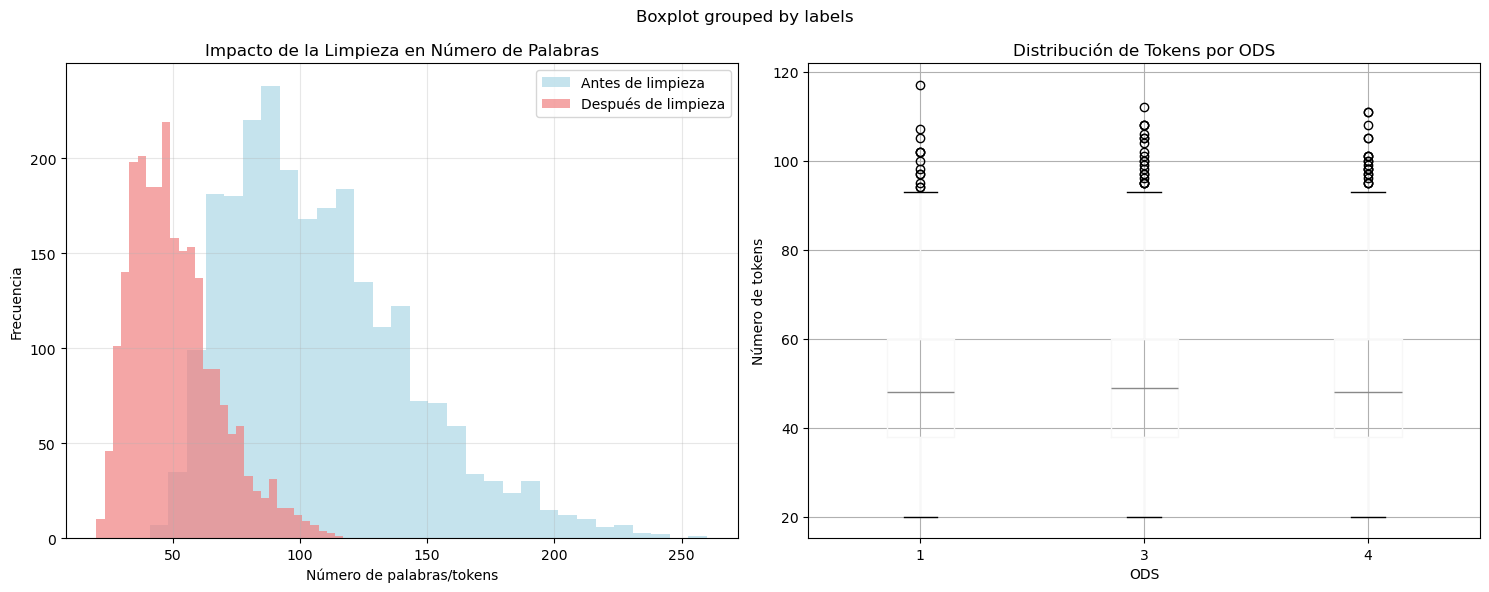


=== VERIFICACIÓN DE LIMPIEZA ===
Textos sin tokens: 0
Tokens mínimos: 20
Tokens máximos: 117


In [9]:
# Importar librerías adicionales para procesamiento de texto
import re
import string
from collections import Counter

# Intentar importar NLTK y descargar recursos
try:
    import nltk
    # Descargar recursos específicos
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)  # Nueva versión de punkt
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    nltk_disponible = True
    print("NLTK configurado correctamente")
except Exception as e:
    print(f"Error con NLTK: {e}")
    print("Usando tokenización alternativa")
    nltk_disponible = False

# Configurar stopwords en español
if nltk_disponible:
    try:
        stop_words_es = set(stopwords.words('spanish'))
    except:
        print("Error cargando stopwords de NLTK, usando lista manual")
        nltk_disponible = False

# Lista manual de stopwords en español (backup)
if not nltk_disponible:
    stop_words_es = {
        'a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fui', 'fuimos', 'fuiste', 'fuisteis', 'ha', 'habida', 'habidas', 'habido', 'habidos', 'habiendo', 'habremos', 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habría', 'habríais', 'habríamos', 'habrían', 'habrías', 'habéis', 'había', 'habíais', 'habíamos', 'habían', 'habías', 'han', 'has', 'hasta', 'hay', 'haya', 'hayamos', 'hayan', 'hayas', 'hayáis', 'he', 'hemos', 'hube', 'hubiera', 'hubierais', 'hubieran', 'hubieras', 'hubieron', 'hubiese', 'hubieseis', 'hubiesen', 'hubieses', 'hubimos', 'hubiste', 'hubisteis', 'hubo', 'la', 'las', 'le', 'les', 'lo', 'los', 'me', 'mi', 'mis', 'mucho', 'muchos', 'muy', 'más', 'mí', 'mía', 'mías', 'mío', 'míos', 'nada', 'ni', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', 'o', 'os', 'otra', 'otras', 'otro', 'otros', 'para', 'pero', 'poco', 'por', 'porque', 'que', 'quien', 'quienes', 'qué', 'se', 'sea', 'seamos', 'sean', 'seas', 'sentid', 'sentida', 'sentidas', 'sentido', 'sentidos', 'seremos', 'será', 'serán', 'serás', 'seré', 'seréis', 'sería', 'seríais', 'seríamos', 'serían', 'serías', 'seáis', 'sido', 'siendo', 'sin', 'sobre', 'sois', 'somos', 'son', 'soy', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 'sí', 'también', 'tanto', 'te', 'tendremos', 'tendrá', 'tendrán', 'tendrás', 'tendré', 'tendréis', 'tendría', 'tendríais', 'tendríamos', 'tendrían', 'tendrías', 'tened', 'tenemos', 'tenga', 'tengamos', 'tengan', 'tengas', 'tengo', 'tengáis', 'tenida', 'tenidas', 'tenido', 'tenidos', 'teniendo', 'tenéis', 'tenía', 'teníais', 'teníamos', 'tenían', 'tenías', 'ti', 'tiene', 'tienen', 'tienes', 'todo', 'todos', 'tu', 'tus', 'tuve', 'tuviera', 'tuvierais', 'tuvieran', 'tuvieras', 'tuvieron', 'tuviese', 'tuvieseis', 'tuviesen', 'tuvieses', 'tuvimos', 'tuviste', 'tuvisteis', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos', 'tú', 'un', 'una', 'uno', 'unos', 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', 'él', 'éramos'
    }

# Agregar stopwords adicionales específicas del dominio
stop_words_adicionales = {
    'además', 'así', 'ejemplo', 'casos', 'caso', 'años', 'año', 'país', 'países',
    'puede', 'pueden', 'debe', 'deben', 'hacer', 'través', 'mediante', 'forma',
    'manera', 'tipo', 'tipos', 'nivel', 'niveles', 'parte', 'partes', 'vez',
    'veces', 'tiempo', 'tiempos', 'lugar', 'lugares', 'número', 'números',
    'ser', 'estar', 'tener', 'haber', 'hacer', 'decir', 'dar', 'ver', 'saber',
    'ir', 'venir', 'llevar', 'pasar', 'seguir', 'poner', 'parecer', 'dejar',
    'encontrar', 'llamar', 'volver', 'empezar', 'creer', 'hablar', 'llevar'
}
stop_words_es.update(stop_words_adicionales)

print(f"Total de stopwords: {len(stop_words_es)}")

def limpiar_texto(texto):
    """
    Función para limpiar y preprocesar texto
    """
    # Convertir a string y minúsculas
    texto = str(texto).lower()
    
    # Remover comillas al inicio y final
    texto = texto.strip('"\'')
    
    # Remover URLs
    texto = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', texto)
    
    # Remover emails
    texto = re.sub(r'\S+@\S+', '', texto)
    
    # Remover números pero mantener palabras con números
    texto = re.sub(r'\b\d+\b', '', texto)
    
    # Remover puntuación pero mantener espacios
    texto = re.sub(r'[^\w\s]', ' ', texto)
    
    # Remover espacios múltiples
    texto = re.sub(r'\s+', ' ', texto)
    
    # Remover espacios al inicio y final
    texto = texto.strip()
    
    return texto

def tokenizar_simple(texto):
    """
    Tokenización simple sin NLTK
    """
    # Dividir por espacios y filtrar tokens vacíos
    tokens = [token.strip() for token in texto.split() if token.strip()]
    return tokens

def tokenizar_y_filtrar(texto):
    """
    Tokenizar texto y remover stopwords
    """
    # Usar tokenización simple o NLTK según disponibilidad
    if nltk_disponible:
        try:
            tokens = word_tokenize(texto, language='spanish')
        except:
            tokens = tokenizar_simple(texto)
    else:
        tokens = tokenizar_simple(texto)
    
    # Filtrar tokens: remover stopwords y tokens muy cortos
    tokens_filtrados = [
        token for token in tokens 
        if token not in stop_words_es 
        and len(token) > 2 
        and token.isalpha()
    ]
    
    return tokens_filtrados

# Aplicar limpieza a dataset de entrenamiento
print("=== LIMPIEZA DATASET DE ENTRENAMIENTO ===")
datos_entrenamiento['texto_limpio'] = datos_entrenamiento['textos'].apply(limpiar_texto)
datos_entrenamiento['tokens'] = datos_entrenamiento['texto_limpio'].apply(tokenizar_y_filtrar)
datos_entrenamiento['num_tokens'] = datos_entrenamiento['tokens'].apply(len)

print("Estadísticas después de limpieza:")
print(f"Promedio de tokens por texto: {datos_entrenamiento['num_tokens'].mean():.1f}")
print(f"Mediana de tokens por texto: {datos_entrenamiento['num_tokens'].median():.1f}")
print(f"Desviación estándar: {datos_entrenamiento['num_tokens'].std():.1f}")

# Aplicar limpieza a dataset de prueba
print("\n=== LIMPIEZA DATASET DE PRUEBA ===")
datos_prueba['texto_limpio'] = datos_prueba['Textos_espanol'].apply(limpiar_texto)
datos_prueba['tokens'] = datos_prueba['texto_limpio'].apply(tokenizar_y_filtrar)
datos_prueba['num_tokens'] = datos_prueba['tokens'].apply(len)

print("Estadísticas después de limpieza:")
print(f"Promedio de tokens por texto: {datos_prueba['num_tokens'].mean():.1f}")
print(f"Mediana de tokens por texto: {datos_prueba['num_tokens'].median():.1f}")

# Ejemplos de limpieza
print("\n=== EJEMPLOS DE LIMPIEZA ===")
for i in range(3):
    print(f"\nEjemplo {i+1}:")
    print(f"Original: {datos_entrenamiento.loc[i, 'textos'][:100]}...")
    print(f"Limpio: {datos_entrenamiento.loc[i, 'texto_limpio'][:100]}...")
    print(f"Tokens: {datos_entrenamiento.loc[i, 'tokens'][:10]}")
    print(f"Número de tokens: {datos_entrenamiento.loc[i, 'num_tokens']}")

# Visualización del impacto de la limpieza
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Comparación antes y después de limpieza
axes[0].hist(datos_entrenamiento['num_palabras'], bins=30, alpha=0.7, 
             label='Antes de limpieza', color='lightblue')
axes[0].hist(datos_entrenamiento['num_tokens'], bins=30, alpha=0.7, 
             label='Después de limpieza', color='lightcoral')
axes[0].set_title('Impacto de la Limpieza en Número de Palabras')
axes[0].set_xlabel('Número de palabras/tokens')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribución por clase después de limpieza
datos_entrenamiento.boxplot(column='num_tokens', by='labels', ax=axes[1])
axes[1].set_title('Distribución de Tokens por ODS')
axes[1].set_xlabel('ODS')
axes[1].set_ylabel('Número de tokens')

plt.tight_layout()
plt.show()

# Verificar que la limpieza funcionó correctamente
print(f"\n=== VERIFICACIÓN DE LIMPIEZA ===")
print(f"Textos sin tokens: {(datos_entrenamiento['num_tokens'] == 0).sum()}")
print(f"Tokens mínimos: {datos_entrenamiento['num_tokens'].min()}")
print(f"Tokens máximos: {datos_entrenamiento['num_tokens'].max()}")

El proceso de limpieza y tokenización resultó exitoso y homogéneo entre los datasets de entrenamiento y prueba. Tras eliminar stopwords, signos de puntuación, números y normalizar el texto, se obtuvo un promedio cercano a 51 tokens por documento en ambos conjuntos, con distribuciones consistentes y sin textos vacíos, lo que confirma la robustez del preprocesamiento. La reducción en la cantidad de palabras respecto a la versión original muestra que la limpieza concentró los textos en términos más significativos, aumentando la calidad de las representaciones para tareas posteriores de modelado. Además, la verificación de rangos (20 a 117 tokens por texto) y los ejemplos prácticos evidencian que la semántica principal se conserva.

En el siguiente bloque se realizará un análisis detallado del vocabulario presente en el dataset de entrenamiento. Primero, se construirá el vocabulario completo a partir de todos los tokens y se calcularán métricas generales como el número total de palabras únicas, la cantidad de tokens y su frecuencia promedio. Posteriormente, se identificarán las palabras más frecuentes y aquellas que aparecen solo una vez, lo que permitirá medir la diversidad léxica. También se explorará el vocabulario de manera diferenciada por clase ODS, destacando las palabras más recurrentes en cada una. Además, se generarán visualizaciones que mostrarán la distribución de frecuencias, el top de palabras más comunes, la variación de tokens por texto y el tamaño de vocabulario por clase. Finalmente, se aplicará un análisis de discriminación léxica, con el fin de identificar las palabras que son más distintivas y representativas de cada clase ODS.

=== ANÁLISIS DE VOCABULARIO ===
Vocabulario total: 13810 palabras únicas
Total de tokens: 123451
Promedio de frecuencia por palabra: 8.94

=== PALABRAS MÁS FRECUENTES ===
salud: 1111
pobreza: 1022
educación: 994
atención: 900
estudiantes: 741
ocde: 591
escuelas: 586
servicios: 549
sistema: 508
niños: 480
personas: 458
calidad: 450
desarrollo: 431
resultados: 416
ingresos: 402
aprendizaje: 400
mayor: 396
evaluación: 380
datos: 379
embargo: 371

Palabras que aparecen solo una vez: 6252 (45.3%)

=== VOCABULARIO POR CLASE ODS ===

ODS 1 - Fin de la pobreza:
  Vocabulario único: 5472 palabras
  Total tokens: 25715
  Palabras más frecuentes: [('pobreza', 1006), ('ingresos', 270), ('pobres', 259), ('niños', 215), ('hogares', 170)]

ODS 3 - Salud y bienestar:
  Vocabulario único: 8172 palabras
  Total tokens: 45791
  Palabras más frecuentes: [('salud', 1062), ('atención', 820), ('servicios', 422), ('mental', 262), ('pacientes', 253)]

ODS 4 - Educación de calidad:
  Vocabulario único: 8076 pal

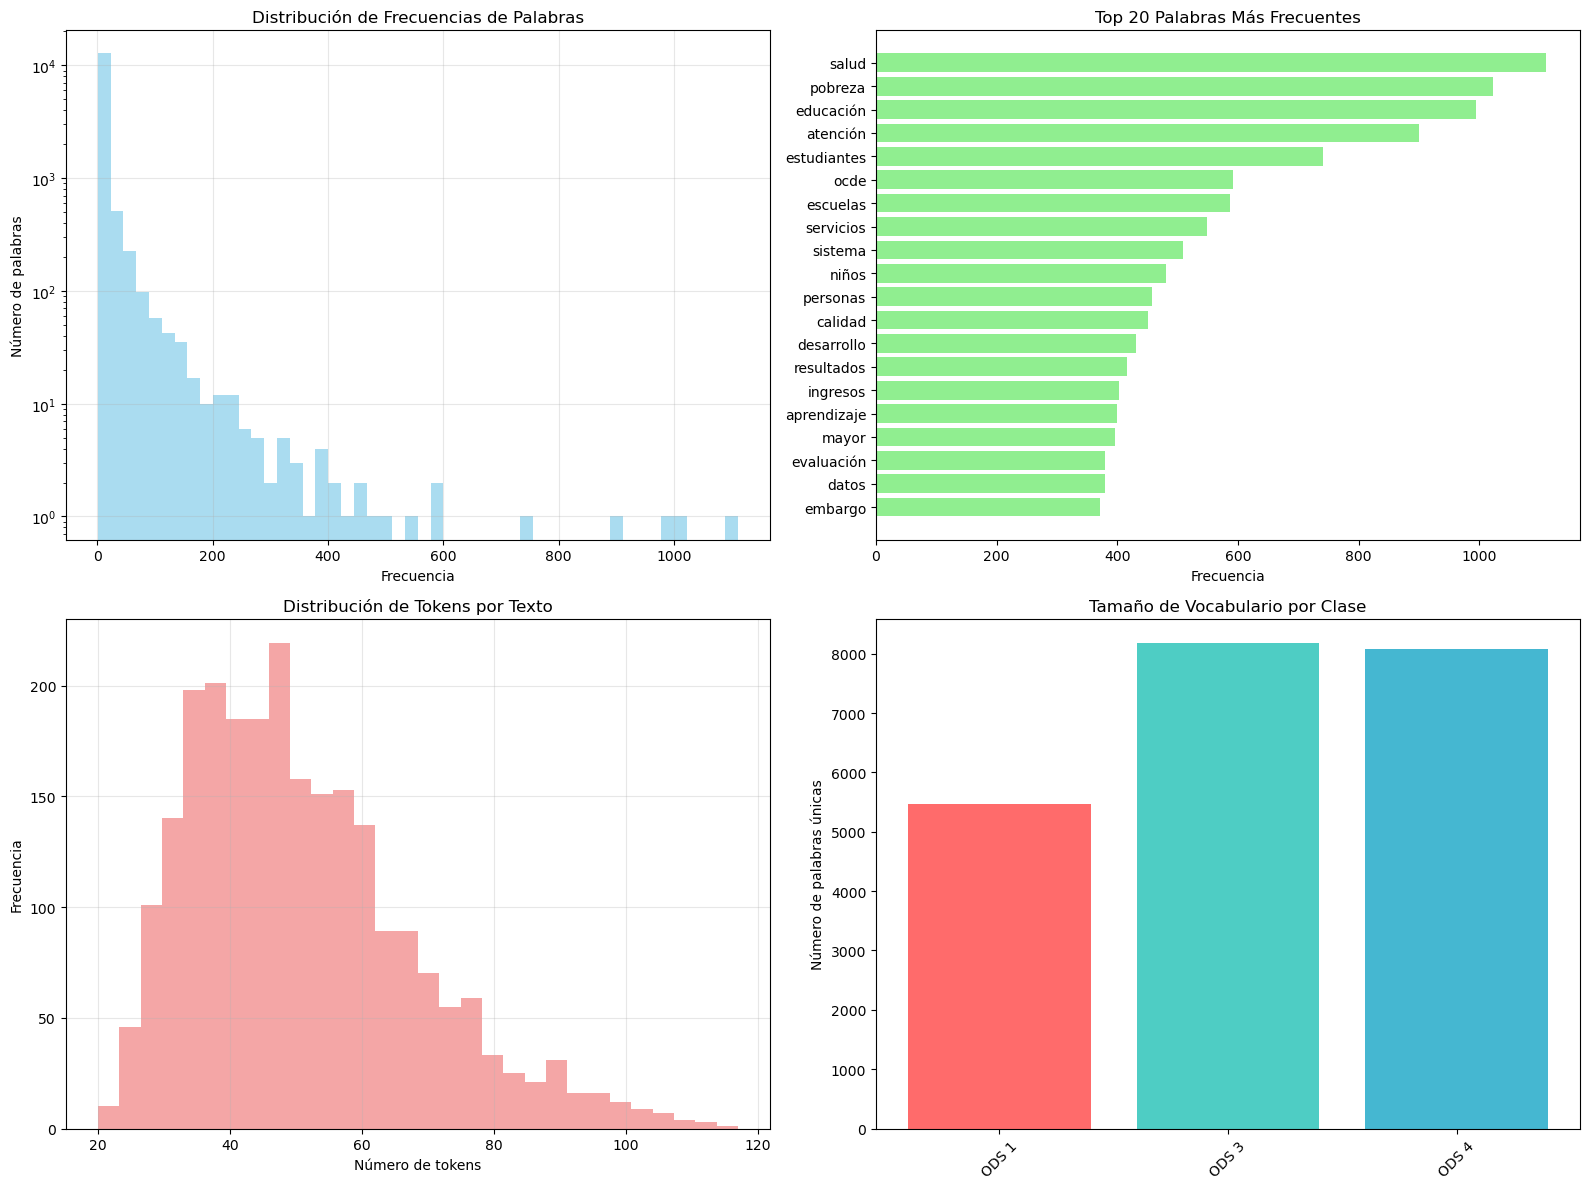


=== PALABRAS DISCRIMINATIVAS POR CLASE ===

ODS 1 - Fin de la pobreza:
  Palabras más discriminativas:
    privación: ratio=357.27, freq=94
    pobreza: ratio=238.97, freq=1006
    extrema: ratio=123.52, freq=65
    monetaria: ratio=81.72, freq=43
    transferencias: ratio=76.01, freq=60
    privaciones: ratio=53.21, freq=42
    pobre: ratio=41.05, freq=54
    pobres: ratio=39.38, freq=259
    relativa: ratio=37.37, freq=59
    umbral: ratio=35.47, freq=56

ODS 3 - Salud y bienestar:
  Palabras más discriminativas:
    enfermedades: ratio=357.85, freq=211
    mental: ratio=148.11, freq=262
    prevención: ratio=115.33, freq=68
    esperanza: ratio=110.24, freq=65
    hospitales: ratio=100.06, freq=118
    muertes: ratio=100.06, freq=59
    mentales: ratio=98.37, freq=58
    médicos: ratio=75.30, freq=222
    medicamentos: ratio=67.84, freq=80
    mortalidad: ratio=64.45, freq=152

ODS 4 - Educación de calidad:
  Palabras más discriminativas:
    profesores: ratio=284.95, freq=207
    

In [10]:
# =====================================================
# ANÁLISIS DEL VOCABULARIO
# =====================================================
print("=== ANÁLISIS DE VOCABULARIO ===")

# -----------------------------------------------------
# Construcción del vocabulario general
# -----------------------------------------------------
todos_tokens = [token for tokens in datos_entrenamiento['tokens'] for token in tokens]
contador_palabras = Counter(todos_tokens)
vocabulario_total = len(contador_palabras)

print(f"Vocabulario total: {vocabulario_total} palabras únicas")
print(f"Total de tokens: {len(todos_tokens)}")
print(f"Promedio de frecuencia por palabra: {len(todos_tokens) / vocabulario_total:.2f}")

# -----------------------------------------------------
# Palabras más y menos frecuentes
# -----------------------------------------------------
print("\n=== PALABRAS MÁS FRECUENTES ===")
palabras_frecuentes = contador_palabras.most_common(20)
for palabra, freq in palabras_frecuentes:
    print(f"{palabra}: {freq}")

palabras_unicas = [p for p, f in contador_palabras.items() if f == 1]
print(f"\nPalabras que aparecen solo una vez: {len(palabras_unicas)} "
      f"({len(palabras_unicas) / vocabulario_total * 100:.1f}%)")

# -----------------------------------------------------
# Análisis por clase ODS
# -----------------------------------------------------
print("\n=== VOCABULARIO POR CLASE ODS ===")
vocabularios_por_clase = {}

for label in sorted(datos_entrenamiento['labels'].unique()):
    subset = datos_entrenamiento[datos_entrenamiento['labels'] == label]
    tokens_clase = [token for tokens in subset['tokens'] for token in tokens]
    
    contador_clase = Counter(tokens_clase)
    vocabularios_por_clase[label] = contador_clase
    
    print(f"\n{mapeo_ods[label]}:")
    print(f"  Vocabulario único: {len(contador_clase)} palabras")
    print(f"  Total tokens: {len(tokens_clase)}")
    print(f"  Palabras más frecuentes: {contador_clase.most_common(5)}")

# -----------------------------------------------------
# Visualizaciones
# -----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribución de frecuencias de palabras
frecuencias = list(contador_palabras.values())
axes[0, 0].hist(frecuencias, bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribución de Frecuencias de Palabras')
axes[0, 0].set_xlabel('Frecuencia')
axes[0, 0].set_ylabel('Número de palabras')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, alpha=0.3)

# Top 20 palabras más frecuentes
palabras_top = [palabra for palabra, _ in palabras_frecuentes]
frecuencias_top = [freq for _, freq in palabras_frecuentes]
axes[0, 1].barh(palabras_top[::-1], frecuencias_top[::-1], color='lightgreen')
axes[0, 1].set_title('Top 20 Palabras Más Frecuentes')
axes[0, 1].set_xlabel('Frecuencia')

# Distribución de tokens por texto
axes[1, 0].hist(datos_entrenamiento['num_tokens'], bins=30, alpha=0.7, color='lightcoral')
axes[1, 0].set_title('Distribución de Tokens por Texto')
axes[1, 0].set_xlabel('Número de tokens')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].grid(True, alpha=0.3)

# Comparación de vocabulario por clase
clases = list(vocabularios_por_clase.keys())
tamaños_vocab = [len(vocabularios_por_clase[c]) for c in clases]
nombres_clases = [f"ODS {c}" for c in clases]
axes[1, 1].bar(nombres_clases, tamaños_vocab, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 1].set_title('Tamaño de Vocabulario por Clase')
axes[1, 1].set_ylabel('Número de palabras únicas')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Palabras discriminativas por clase (TF-IDF simple)
# -----------------------------------------------------
print("\n=== PALABRAS DISCRIMINATIVAS POR CLASE ===")

for label in sorted(datos_entrenamiento['labels'].unique()):
    print(f"\n{mapeo_ods[label]}:")
    
    contador_clase = vocabularios_por_clase[label]
    total_tokens_clase = sum(contador_clase.values())
    palabras_importantes = []
    
    for palabra, freq in contador_clase.most_common(100):  # Top 100
        freq_relativa = freq / total_tokens_clase
        
        # Comparación contra otras clases
        freq_otras_clases, total_otras_clases = 0, 0
        for other_label in vocabularios_por_clase:
            if other_label != label:
                freq_otras_clases += vocabularios_por_clase[other_label].get(palabra, 0)
                total_otras_clases += sum(vocabularios_por_clase[other_label].values())
        
        if total_otras_clases > 0:
            freq_relativa_otras = freq_otras_clases / total_otras_clases
            if freq_relativa_otras > 0:
                ratio_discriminacion = freq_relativa / freq_relativa_otras
                palabras_importantes.append((palabra, ratio_discriminacion, freq))
    
    # Ordenar y mostrar top discriminativas
    palabras_importantes.sort(key=lambda x: x[1], reverse=True)
    print("  Palabras más discriminativas:")
    for palabra, ratio, freq in palabras_importantes[:10]:
        print(f"    {palabra}: ratio={ratio:.2f}, freq={freq}")


El análisis de vocabulario revela que el corpus cuenta con 13.810 palabras únicas y un total de 123.451 tokens, de los cuales cerca del 45 % aparecen solo una vez, lo que indica una gran diversidad léxica. Las palabras más frecuentes están alineadas con las temáticas de los ODS estudiados, destacándose términos como salud, pobreza, educación, atención y estudiantes. A nivel de clases, ODS 1 presenta un vocabulario de 5.472 palabras únicas con alta recurrencia de pobreza e ingresos, ODS 3 alcanza 8.172 palabras con predominio de salud y pacientes, y ODS 4 suma 8.076 con énfasis en educación, estudiantes y docentes. Además, las palabras discriminativas muestran un claro poder de separación temática: términos como privación o monetaria para ODS 1, enfermedades o mental para ODS 3, y profesores o alumnos para ODS 4, lo que confirma que el vocabulario no solo es amplio, sino también altamente representativo y específico de cada clase.

## 3. Implementación de Bag of words y creación de modelos de clasificación

Aqui se definen los modelos a utilizar. En este caso se utilizará Logistic regression, 
naive bayes, maquinas de vectores de soporte y random forest. Además, en cuanto a las metricas de calidad, las métricas principales son precisión, recall, f1-score y support. La precisión mide la proporción de predicciones correctas dentro de todo lo que el modelo clasificó como una categoría determinada, es decir, qué tan confiable es cuando afirma que un texto pertenece a una clase. El recall indica la proporción de ejemplos reales de una clase que el modelo logró identificar correctamente, reflejando su capacidad para no dejar escapar casos relevantes. El f1-score es la media armónica entre precisión y recall, y sirve como una métrica de balance, especialmente útil cuando una clase tiene menos ejemplos que otras. El support corresponde al número real de instancias de cada clase en el conjunto de prueba, y nos ayuda a entender el peso relativo de cada categoría al interpretar los resultados. Para la obtención automática de estas métricas utilizamos la función classification_report de la librería scikit-learn, que resume en una tabla los valores de cada métrica por clase, así como los promedios globales.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


X = datos_entrenamiento["texto_limpio"] 
y = datos_entrenamiento["labels"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "SVM (LinearSVC)": LinearSVC(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=None, random_state=42, n_jobs=-1
    )
}


for nombre, modelo in modelos.items():
    print(f"\n=== Resultados {nombre} ===")
    
    # pipeline
    pipeline = Pipeline([
        ("bow", CountVectorizer()),
        ("clf", modelo)
    ])
    
 
    pipeline.fit(X_train, y_train)
    
 
    y_pred = pipeline.predict(X_test)

    print(classification_report(y_test, y_pred))


=== Resultados Logistic Regression ===
              precision    recall  f1-score   support

           1       0.95      0.88      0.91       101
           3       0.93      0.95      0.94       179
           4       0.96      0.98      0.97       205

    accuracy                           0.95       485
   macro avg       0.95      0.94      0.94       485
weighted avg       0.95      0.95      0.95       485


=== Resultados Naive Bayes ===
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       101
           3       0.97      0.96      0.96       179
           4       0.97      0.98      0.97       205

    accuracy                           0.96       485
   macro avg       0.96      0.96      0.96       485
weighted avg       0.96      0.96      0.96       485


=== Resultados SVM (LinearSVC) ===
              precision    recall  f1-score   support

           1       0.96      0.92      0.94       101
           3       0.

### 3.1 Analisís de Logistic Regression con BOW
En el caso de Logistic Regression con Bag of Words, el modelo alcanzó un accuracy del 95% con un desempeño bastante sólido en todas las clases. En particular, mostró un f1-score de 0.91 para ODS 1 (pobreza), 0.94 para ODS 3 (salud) y 0.97 para ODS 4 (educación). El rendimiento más bajo se observó en ODS 1, donde el recall fue de 0.88, lo que indica que el modelo dejó de reconocer algunos textos relacionados con la pobreza, probablemente debido a que esta clase tiene menos ejemplos en el conjunto de datos. Aun así, el modelo logró un balance adecuado entre precisión y cobertura en las tres categorías.

### 3.2 Analisís de Naive Bayes con BOW
El modelo de Naive Bayes con Bag of Words alcanzó un accuracy del 96%, superando ligeramente a la regresión logística y mostrando un desempeño muy equilibrado en las tres clases. En particular, obtuvo un f1-score de 0.95 para ODS 1 (pobreza), 0.96 para ODS 3 (salud) y 0.97 para ODS 4 (educación). A diferencia de la regresión logística, Naive Bayes logró mejorar el recall en ODS 1, pasando de 0.88 a 0.95, lo cual indica que fue más efectivo reconociendo textos asociados a la pobreza, una clase que presenta menor representación en el dataset. Este resultado confirma que Naive Bayes a pesar de su simplicidad y del supuesto de independencia entre palabras, este un modelo altamente calificado para las tareas de clasificación de texto.

### 3.3 Analisís de SVM con BOW
El modelo de SVM con Bag of Words también alcanzó un accuracy del 96%, posicionándose al nivel de Naive Bayes y por encima de la regresión logística. Su desempeño fue consistente en todas las clases, con un f1-score de 0.94 para ODS 1 (pobreza), 0.95 para ODS 3 (salud) y 0.97 para ODS 4 (educación). Aunque el recall en ODS 1 (0.92) resultó ligeramente menor que el obtenido con Naive Bayes, SVM mostró una alta precisión en esta clase, lo que significa que cuando predice un texto como pobreza, casi siempre acierta. Esto refleja que los modelos de SVM son especialmente efectivos en espacios de alta dimensionalidad como el generado por Bag of Words.

### 3.4 Analisís de Random Forest con BOW
El modelo de Random Forest con Bag of Words alcanzó un accuracy del 95%, un desempeño ligeramente inferior al de Naive Bayes y SVM. En términos de clases, obtuvo un f1-score de 0.92 para ODS 1 (pobreza), 0.95 para ODS 3 (salud) y 0.97 para ODS 4 (educación). El principal punto débil estuvo en el recall de ODS 1 (0.88), lo que confirma que el modelo tuvo dificultades para identificar correctamente todos los textos relacionados con la pobreza. La decisión de implementar este cuarto modelo se tomó con un propósito analítico ya que en clase se había mencionado que los algoritmos basados en árboles no son los más recomendados para problemas de texto debido a la alta dimensionalidad y dispersión de las representaciones como Bag of Words. Los resultados obtenidos validan esta afirmación ya que, si bien Random Forest logra un rendimiento competitivo, no supera a los modelos lineales o probabilísticos y pierde efectividad en la clase menos representada.

### 3.5 Conclusiones de negocio y modelo escogido
El análisis de los textos comenzó con la identificación de las palabras más frecuentes y discriminativas en cada categoría de ODS, lo cual permitió relacionar de manera directa las opiniones ciudadanas con los temas de pobreza, salud y educación. Se observó que términos vinculados con ingresos, desigualdad o pobreza aparecen de forma recurrente en los textos asociados al ODS 1, mientras que palabras como hospital, salud, pacientes o médicos se relacionan con el ODS 3, y expresiones como educación, escuela, estudiantes o formación son características del ODS 4. Este ejercicio cualitativo confirma que los modelos están capturando patrones coherentes con los problemas sociales, y aporta a la organización un mapa de términos clave que puede servir para diseñar campañas de comunicación más focalizadas, orientar la inversión de recursos y priorizar políticas públicas en los ámbitos donde la percepción ciudadana es más fuerte. En este sentido, el análisis no solo respalda la pertinencia técnica de los modelos, sino que también genera información estratégica y útil para el UNFPA en su labor de alineación con los Objetivos de Desarrollo Sostenible.

Al comparar los cuatro modelos evaluados con Bag of Words, se observa que tanto Naive Bayes como SVM alcanzaron el mejor rendimiento global, con un accuracy del 96%, superando a la regresión logística (95%) y a Random Forest (95%). En particular, Naive Bayes logró un recall superior en ODS 1 (pobreza), lo cual es relevante ya que esta categoría está menos representada en el dataset y resulta crítica en el análisis del proyecto. Por su parte, SVM ofreció un rendimiento igualmente alto, destacando en precisión, aunque con un ligero sacrificio en recall para la misma clase. La regresión logística se consolidó como un baseline sólido y confiable, mientras que Random Forest aunque fue competitivo, confirmó lo discutido en clase, que es que los modelos basados en árboles no son los más adecuados para datos textuales de alta dimensionalidad, mostrando menor balance en las clases minoritarias.

Con base en estos resultados, se selecciona como modelo final a Naive Bayes con Bag of Words, dado que combina simplicidad computacional con una capacidad notable para reconocer de manera equilibrada las tres categorías de ODS, y en especial porque mejora la detección de los textos asociados a la pobreza. Sus principales ventajas son su rapidez de entrenamiento y predicción, su eficiencia con grandes vocabularios, y su alto recall en clases críticas, lo que lo hace práctico para implementaciones en contextos donde se requiera clasificar gran cantidad de opiniones ciudadanas en tiempo real. Entre sus desventajas se encuentra que depende de la representación BoW y del supuesto de independencia entre palabras, lo que podría limitar su rendimiento en textos más complejos o con estructuras semánticas profundas. Desde una perspectiva de negocio, Naive Bayes ofrece una solución costo-efectiva, interpretable y de fácil despliegue, lo que lo convierte en la opción más adecuada para apoyar la labor del UNFPA en la clasificación automática de opiniones según los ODS.